# **Project Name**    -



##### **Project Type**    - Zomato Restaurant Clustering And Sentiment Analysis
##### **Contribution**    - Individual
##### **Team Member 1 -** - Varun Chaturvedi

# **Project Summary -**



This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The project centers around Zomato, a prominent online food delivery platform. It involves two key datasets: one for restaurant information and the other for user reviews.
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.
The initial phase of this project involved rigorous data cleaning and preprocessing to ensure the data's suitability for comprehensive analysis. Subsequently, we conducted Exploratory Data Analysis (EDA) on both datasets, providing insights into the dataset's composition and features.


There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.






# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**


 To analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato.The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments.

  The objective of this project is to conduct EDA , Clustering and Sentiment Analysis on two datasets related to Zomato, a popular restaurant discovery and food delivery platform. The analysis aims to gain insights into restaurant clustering and user sentiment towards different restaurants listed on Zomato.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [237]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import LatentDirichletAllocation


import pyLDAvis
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
meta_df_main=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone project/Zomato Restaurant Clustering And Sentiment Analysis/Zomato Restaurant names and Metadata.csv")
review_df=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone project/Zomato Restaurant Clustering And Sentiment Analysis/Zomato Restaurant reviews.csv')

In [4]:
# Creating the copy of dataset.
meta_df = meta_df_main.copy()


### Dataset First View

In [5]:
# Dataset First Look

meta_df.head()


Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [6]:
# Dataset First Look(review_df)
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

print(f' We have total {meta_df.shape[0]} rows and {meta_df.shape[1]} columns.')

 We have total 105 rows and 6 columns.


In [8]:
# Dataset Rows & Columns count(review_df)
print(f' We have total {review_df.shape[0]} rows and {review_df.shape[1]} columns.')

 We have total 10000 rows and 7 columns.


### Dataset Information

In [9]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
# Dataset Info(review_df)
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count

meta_df.duplicated(keep='last').sum()

0

In [12]:
# Resting Index.

meta_df.reset_index(inplace=True)

In [13]:
# Checking duplicate restaurant name.

meta_df['Name'].duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count

meta_df.isnull().sum()

index           0
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [15]:
# Checking for Null values.

meta_df[meta_df['Collections'].isnull()].head()

index                      Name  \
7       7  Shah Ghouse Spl Shawarma   
15     15                       KFC   
16     16       NorFest - The Dhaba   
17     17          Hotel Zara Hi-Fi   
23     23                      Amul   

                                                Links Cost Collections  \
7   https://www.zomato.com/hyderabad/shah-ghouse-s...  300         NaN   
15    https://www.zomato.com/hyderabad/kfc-gachibowli  500         NaN   
16  https://www.zomato.com/hyderabad/norfest-the-d...  550         NaN   
17  https://www.zomato.com/hyderabad/hotel-zara-ga...  400         NaN   
23   https://www.zomato.com/hyderabad/amul-gachibowli  150         NaN   

                 Cuisines                 Timings  
7                Lebanese  12 Noon to 12 Midnight  
15      Burger, Fast Food          11 AM to 11 PM  
16           North Indian     12 Noon to 10:30 PM  
17  Chinese, North Indian        11:30 AM to 1 AM  
23    Ice Cream, Desserts           10 AM to 5 AM

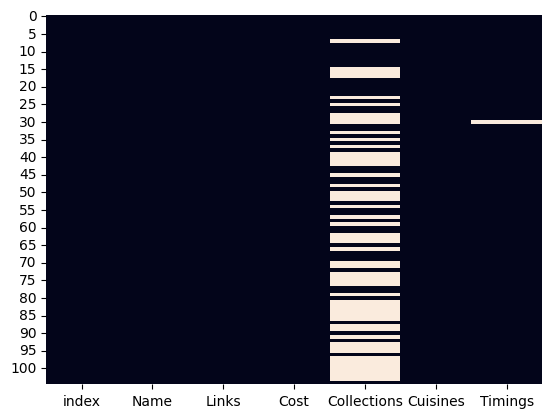

In [16]:
# Visualizing the missing values

sns.heatmap(meta_df.isnull(), cbar=False);


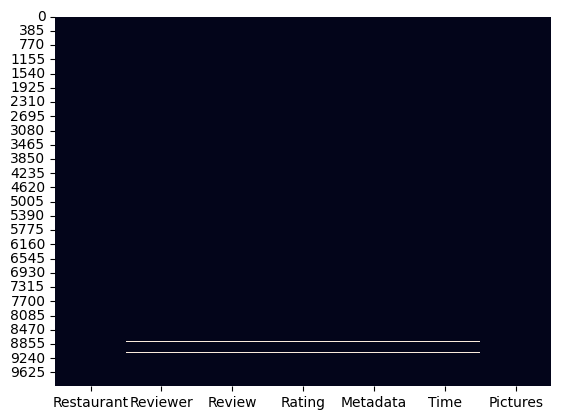

In [17]:
sns.heatmap(review_df.isnull(), cbar=False);

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns restaurant
print(f'Features : {meta_df.columns.to_list()}')

Features : ['index', 'Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [19]:
# Dataset Columns review
print(f'Features : {review_df.columns.to_list()}')

Features : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [20]:
# Dataset Describe restaurant
meta_df.describe().T

count  mean        std  min   25%   50%   75%    max
index  105.0  52.0  30.454885  0.0  26.0  52.0  78.0  104.0

In [21]:
# Dataset Describe review
review_df.describe(include='all').T

count unique              top  freq    mean       std  min  25%  \
Restaurant    10000    100  Beyond Flavours   100     NaN       NaN  NaN  NaN   
Reviewer       9962   7446      Parijat Ray    13     NaN       NaN  NaN  NaN   
Review         9955   9364             good   237     NaN       NaN  NaN  NaN   
Rating         9962     10                5  3832     NaN       NaN  NaN  NaN   
Metadata       9962   2477         1 Review   919     NaN       NaN  NaN  NaN   
Time           9962   9782  7/29/2018 20:34     3     NaN       NaN  NaN  NaN   
Pictures    10000.0    NaN              NaN   NaN  0.7486  2.570381  0.0  0.0   

            50%  75%   max  
Restaurant  NaN  NaN   NaN  
Reviewer    NaN  NaN   NaN  
Review      NaN  NaN   NaN  
Rating      NaN  NaN   NaN  
Metadata    NaN  NaN   NaN  
Time        NaN  NaN   NaN  
Pictures    0.0  0.0  64.0

### Variables Description

###**Zomato Restaurant**

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

###**Zomato Restaurant Reviews**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable (for restaurant)

for i in meta_df.columns.tolist():
  print("No. of unique values in ",i,"is",meta_df[i].nunique(),".")

No. of unique values in  index is 105 .
No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [23]:
#Check Unique Values for each variable (for review )
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.

In [25]:
#before changing data type for cost checking values
meta_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [26]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.

meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

In [27]:
#top 5 costlier restaurant
meta_df.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [28]:
#top 5 economy restaurant
meta_df.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

Name  Cost
85         Momos Delight   200
29    Hunger Maggi Point   200
101         Sweet Basket   200
89   Mohammedia Shawarma   150
23                  Amul   150

In [29]:
#hotels that share same price
hotel_dict = {}
amount = meta_df.Cost.values.tolist()

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = meta_df[meta_df['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = meta_df.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
4    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
17   600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
20   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
2   1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
8    400  [Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...                 6

In [30]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
26  2800             [Collage - Hyatt Hyderabad Gachibowli]                 1
22  2500                 [Feast - Sheraton Hyderabad Hotel]                 1
12  1900  [10 Downing Street, Jonathan's Kitchen - Holid...                 2
25  1800          [Cascade - Radisson Hyderabad Hitec City]                 1
27  1750                  [Zega - Sheraton Hyderabad Hotel]                 1

In [31]:
# spliting the cusines and storing in list
cuisine_value_list = meta_df.Cuisines.str.split(', ')

In [32]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [33]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [34]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [35]:
# spliting the cusines and storing in list
Collections_value_list = meta_df.Collections.dropna().str.split(', ')

In [36]:
# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [37]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [38]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

###**Reviews**

In [39]:
#in order to change data type for rating checking values
review_df.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [40]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review_df.loc[review_df['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review_df['Rating'] = review_df['Rating'].astype('float')

In [41]:
#since there is one rating as like converting it to median
review_df.loc[review_df['Rating'] == 0] = review_df.Rating.median()

In [42]:
#changing date and extracting few feature for manipulation

review_df['Reviewer_Total_Review'],review_df['Reviewer_Followers']=review_df['Metadata'].str.split(',').str
review_df['Reviewer_Total_Review'] = pd.to_numeric(review_df['Reviewer_Total_Review'].str.split(' ').str[0])
review_df['Reviewer_Followers'] = pd.to_numeric(review_df['Reviewer_Followers'].str.split(' ').str[1])
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Review_Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Review_Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Review_Hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [43]:
#Average engagement of restaurants
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                                      4.0    4.00             1
1                        10 Downing Street    3.80           100
2                                 13 Dhaba    3.48           100
3           3B's - Buddies, Bar & Barbecue    4.76           100
4                AB's - Absolute Barbecues    4.88           100
..                                     ...     ...           ...
96              Urban Asia - Kitchen & Bar    3.65           100
97   Yum Yum Tree - The Arabian Food Court    3.56           100
98         Zega - Sheraton Hyderabad Hotel    4.45           100
99                Zing's Northeast Kitchen    3.65           100
100                                eat.fit    3.20           100

[101 rows x 3 columns]

In [44]:
#usless data
review_df[review_df['Restaurant'] == 4.0]

Restaurant Reviewer Review  Rating Metadata  \
7601        4.0      4.0    4.0     4.0      4.0   

                              Time  Pictures  Reviewer_Total_Review  \
7601 1970-01-01 00:00:00.000000004         4                    NaN   

      Reviewer_Followers  Review_Year  Review_Month  Review_Hour  
7601                 NaN       1970.0           1.0          0.0

In [45]:
#checking hotel count as total hotel in restaurant data was 105
review_df.Restaurant.nunique()

101

In [46]:
#finding hotel without review
hotel_without_review = [name for name in meta_df.Name.unique().tolist()
       if name not in review_df.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [47]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

Restaurant  Rating  Total_Review
4        AB's - Absolute Barbecues    4.88           100
12                          B-Dubs    4.81           100
3   3B's - Buddies, Bar & Barbecue    4.76           100
68                        Paradise    4.70           100
36                        Flechazo    4.66           100

In [48]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

Restaurant  Rating  Total_Review
42  Hotel Zara Hi-Fi   2.400           100
11    Asian Meal Box   2.580           100
67     Pakwaan Grand   2.710           100
58     Mathura Vilas   2.820           100
15   Behrouz Biryani   2.825           100

In [49]:
#Finding the most followed critic
most_followed_reviewer = review_df.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5464    Satwinder Singh                  186.0             13410.0   
1702         Eat_vth_me                   60.0             13320.0   
5236       Samar Sardar                    8.0             11329.0   
1788  Foodies Hyderabad                   31.0              9494.0   
6230           Srinivas                   34.0              7628.0   

      Average_Rating_Given  
5464              3.666667  
1702              5.000000  
5236              3.500000  
1788              4.500000  
6230              3.714286

In [50]:
#finding which year show maximum engagement
hotel_year = review_df.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

Review_Year                                         Restaurant  Count
0       1970.0                                              [4.0]      1
1       2016.0  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
2       2017.0  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
3       2018.0  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
4       2019.0  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [51]:
#merging both data frame
hotel = meta_df.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review_df, on = 'Restaurant')
merged.shape

(9999, 18)

In [52]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [53]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues    4.88       1500.0
11                          B-Dubs    4.81       1600.0
2   3B's - Buddies, Bar & Barbecue    4.76       1100.0
67                        Paradise    4.70        800.0
35                        Flechazo    4.66       1300.0

In [54]:

#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]


Restaurant  Rating  Price_Point
41  Hotel Zara Hi-Fi   2.400        400.0
10    Asian Meal Box   2.580        200.0
66     Pakwaan Grand   2.710        400.0
57     Mathura Vilas   2.820        500.0
14   Behrouz Biryani   2.825        600.0

In [55]:

#rating count by reviewer
rating_count_df = pd.DataFrame(review_df.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

Rating_Count
Reviewer                  
Parijat Ray             13
Ankita                  13
Kiran                   12
Vedant Killa            11
Jay Mehta               11

### What all manipulations have you done and insights you found?

###**Restaurant data**

 In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

###**Review data**

In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews.

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [56]:
# Chart - 1 visualization code

top10_res_by_cost = meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

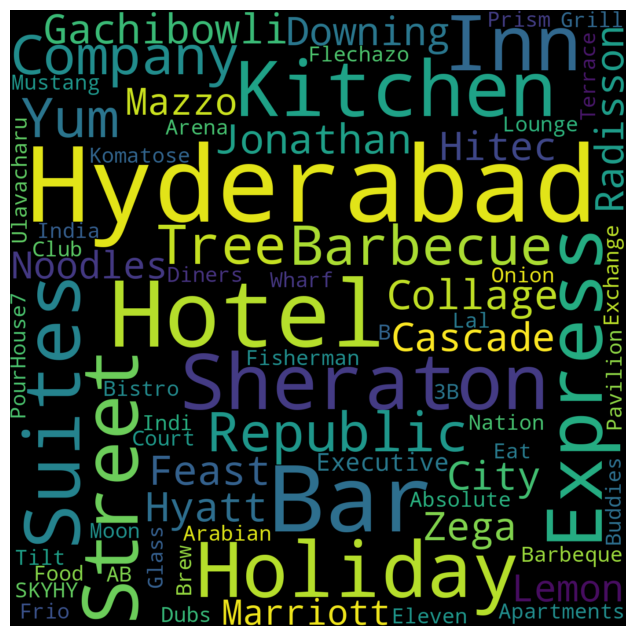

In [57]:
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

##### 1. Why did you pick the specific chart?

The Word Cloud chart was chosen for its ability to visually represent the most frequent words in the top 30 reviews, offering a concise summary of prominent themes and sentiments

##### 2. What is/are the insight(s) found from the chart?

The terms 'hyderabad,' 'holiday,' and 'hotel' are the most commonly occurring words in the reviews

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the Word Cloud can be valuable for creating a positive business impact. If the prevalent words in the Word Cloud reflect positive experiences, it can inform the restaurant's strengths and areas where they excel

#### Chart - 2

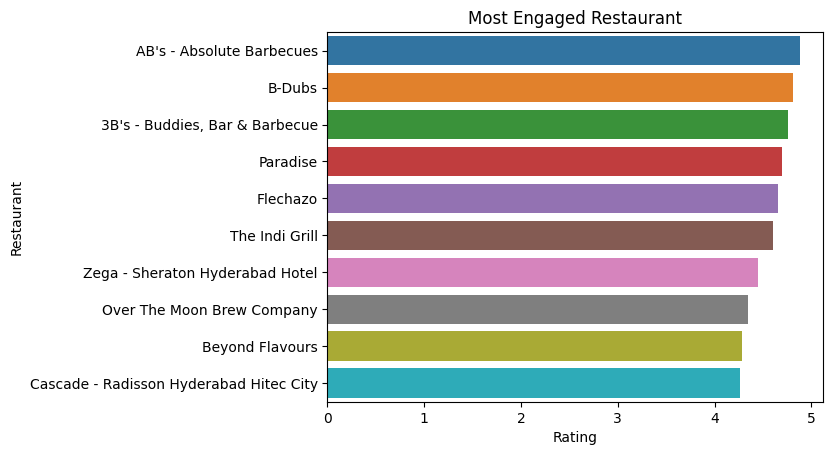

In [58]:
# Chart - 2 visualization code
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot for the above graph because it show frequency level for different category.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

#### Chart - 3

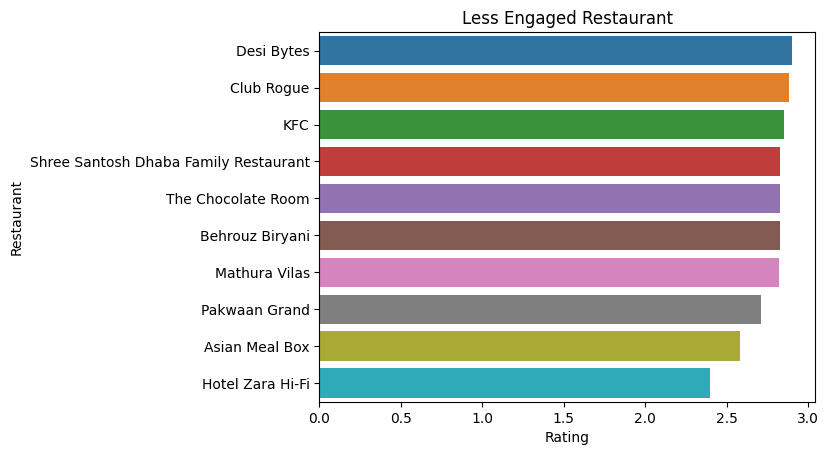

In [59]:
# Chart - 3 visualization code

#chart for less liked hotels
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot for the above graph because it show frequency level for different category.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue

#### Chart - 4

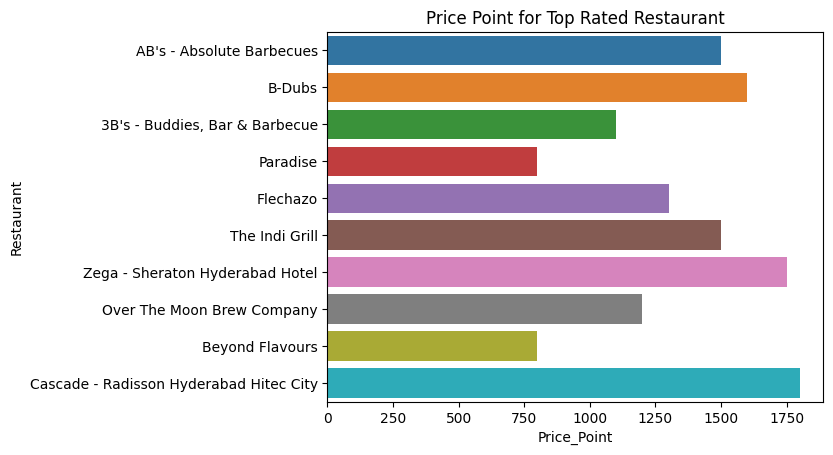

In [60]:
# Chart - 4 visualization code

# visualization code for price point of high rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

Here I choose barplot because bar plot is a good choice for plotting hotel name and price point as it is a simple and effective way to display the comparison of different categories (hotel names) and their corresponding values (price points) on the same chart.

##### 2. What is/are the insight(s) found from the chart?

Price point for high rated hotel AB's= Absolute Barbecues is 1500

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.

Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.

#### Chart - 5

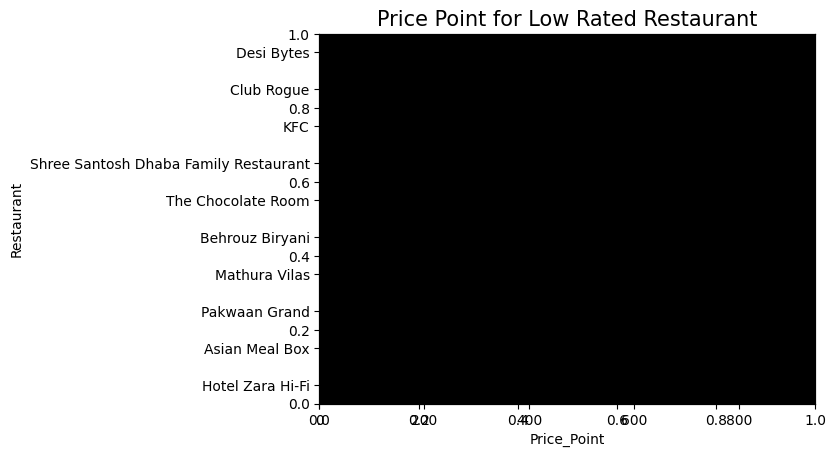

In [61]:
# Chart - 5 visualization code

#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point',
            y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)
# Setting the background color of the plot
# using set_facecolor() method
ax = plt.axes()
ax.set_facecolor("black")
plt.show()

##### 1. Why did you pick the specific chart?

 The bar plot allow to have a sense of the price range of each hotel and how they compare to each other.The bar plot is a good choice for plotting hotel name and price point as it is a simple and effective way to display the comparison of different categories (hotel names) and their corresponding values (price points) on the same chart.

##### 2. What is/are the insight(s) found from the chart?

Price point for low rated restaurant Hotel Zara Hi-Fi is 400

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.

However it can not be finalized that this hotel should unlisted as there may be chance of different cuisine they both serve and it also depend upon the locality they both serve, therefore based on that small promotional offers can also be given for low rated restaurant to increase sales.

#### Chart - 6

In [62]:
# Chart - 6 visualization code

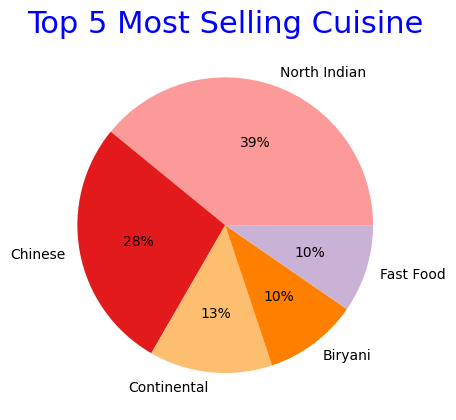

In [63]:
# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

##### 1. Why did you pick the specific chart?

Here I choose to use pie chart because it show proportion of each quantity and used wordcloud because it show all text and highlight the most frequent words

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the Commoditized Cuisine plays an important role as it helps in identifying the challenge or Competitive Advantage i.e., Knowing which cuisines are commoditized allows a restaurant or food business to differentiate themselves from their competitors by offering unique and non-commoditized options.

If a cuisine is commoditized, the prices for ingredients and labor for that cuisine may be higher than for non-commoditized cuisines. Identifying these commoditized cuisines can help a business to control costs by focusing on non-commoditized options or finding ways to lower the cost of commoditized items.

#### Chart - 7

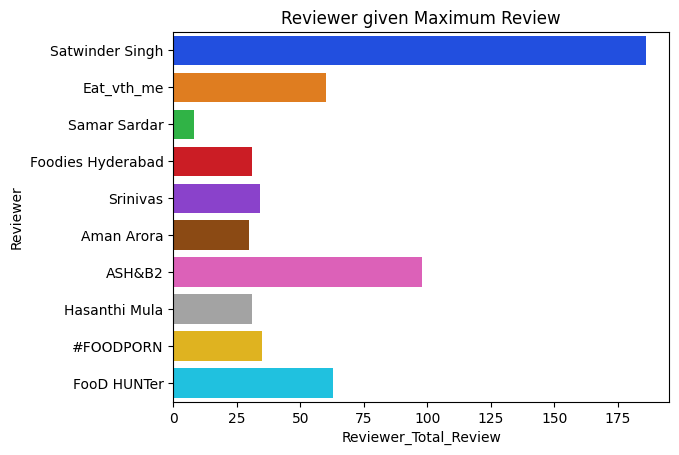

In [64]:
# Chart - 7 visualization code

#visualization code for most review

sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps in understanding the frequency of rating, follower and total reviews with respect to reviewer. Plotting total review, average reviewer rating, and total follower allows to see the correlation between these variables and how they relate to one another for each reviewer. It can also give insight on how reviewers with more followers tend to get more reviews, how their ratings tend to be, etc

##### 2. What is/are the insight(s) found from the chart?

Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

#### Chart - 8

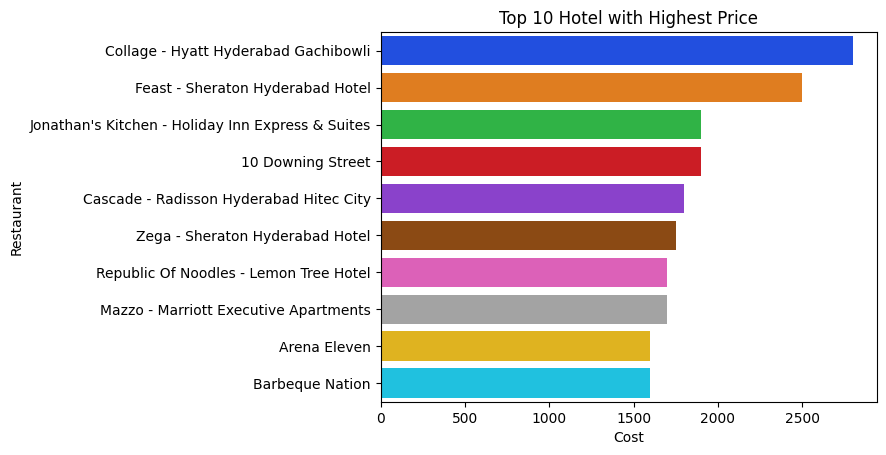

In [65]:
# Chart - 8 visualization code

# visualization code for howtel with maximum price

price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()



##### 1. Why did you pick the specific chart?

Barplot helps in plotting the frquency of cost for each hotel

#### Chart - 9

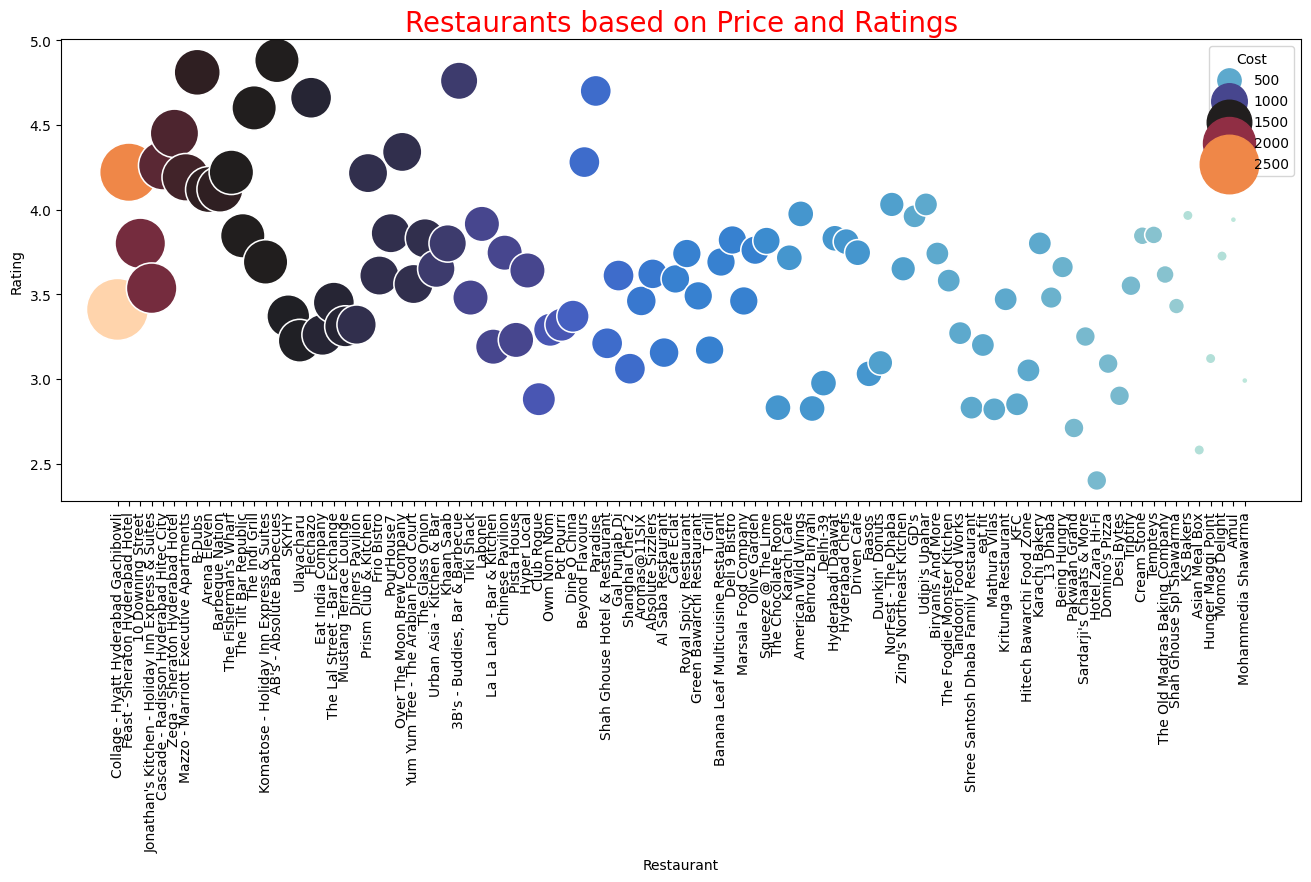

In [66]:
# Chart - 9 visualization code


#chart to understand expected revenue

#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']



#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost",
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()



#### Chart - 10

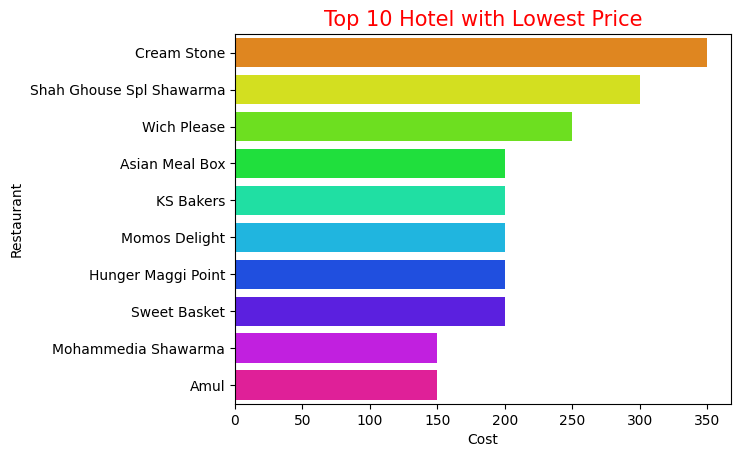

In [67]:
# Chart - 10 visualization code

#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()



##### 1. Why did you pick the specific chart?

Barplot helps in plotting the frquency of price for each hotel

#### Chart - 11

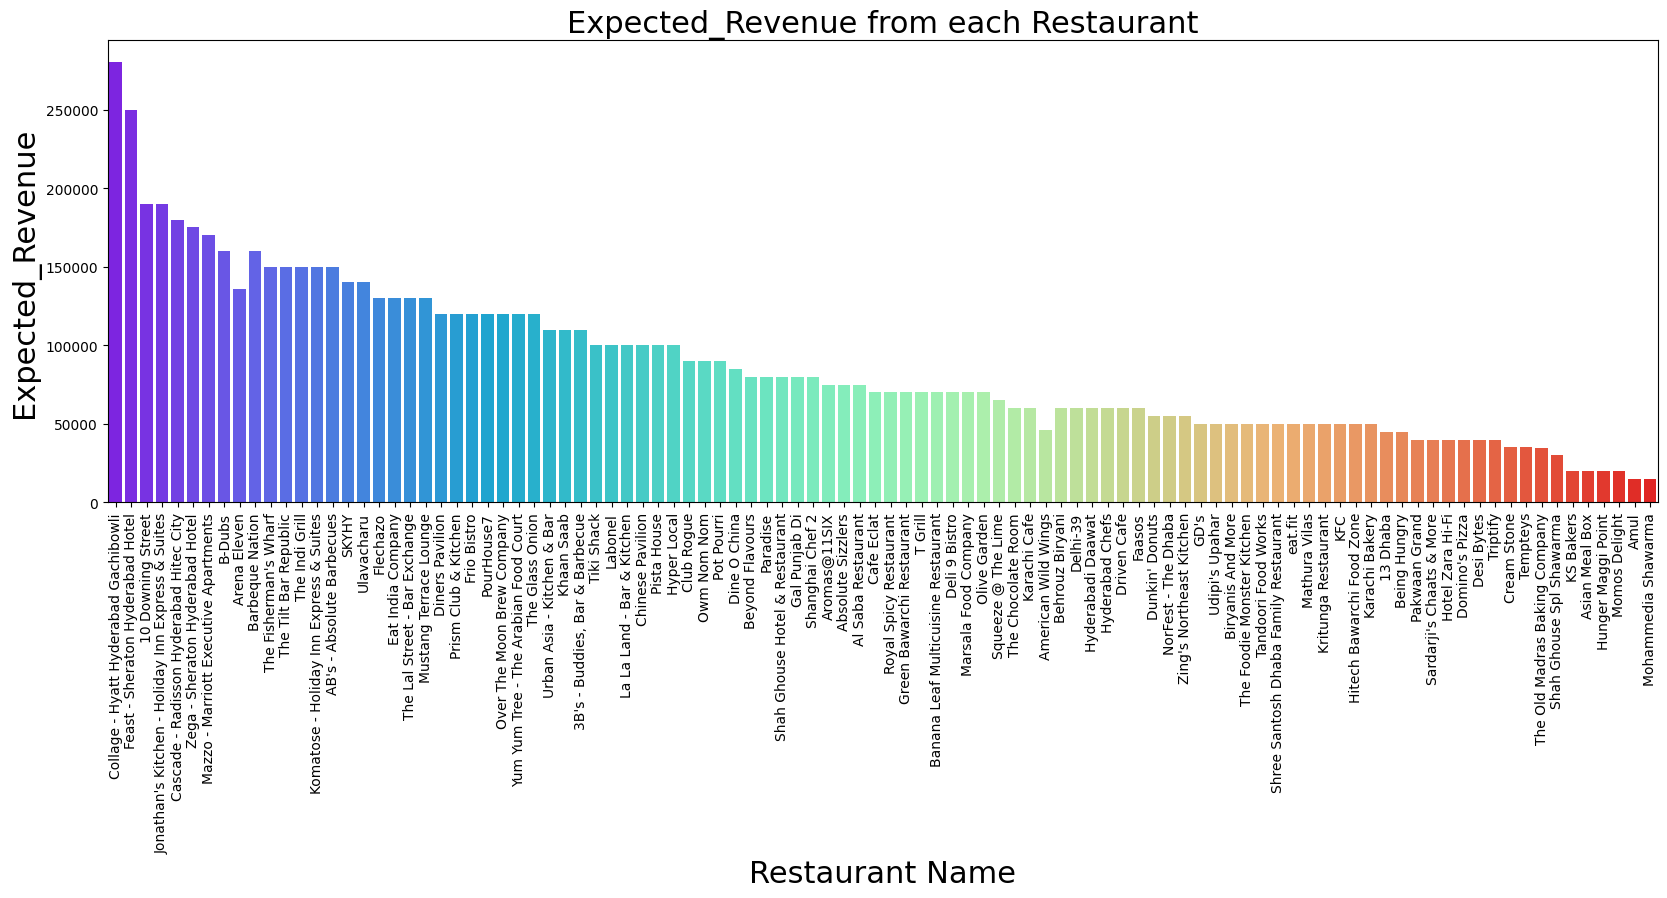

In [68]:
# Chart - 11 visualization code

fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plt.title("Expected_Revenue from each Restaurant", size = 22)
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()

#### Chart - 12

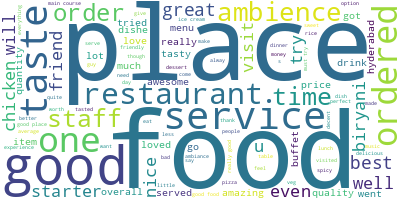

In [69]:
# Chart - 12 visualization code

# Word cloud for positive reviews.

from wordcloud import WordCloud
review_df['Review']=review_df['Review'].astype(str)

ps = PorterStemmer()
review_df['Review']=review_df['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(review_df['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

#### Chart - 13

In [70]:
# Chart - 13 visualization code
from textblob import TextBlob
review_df['Polarity'] = review_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: ylabel='Frequency'>

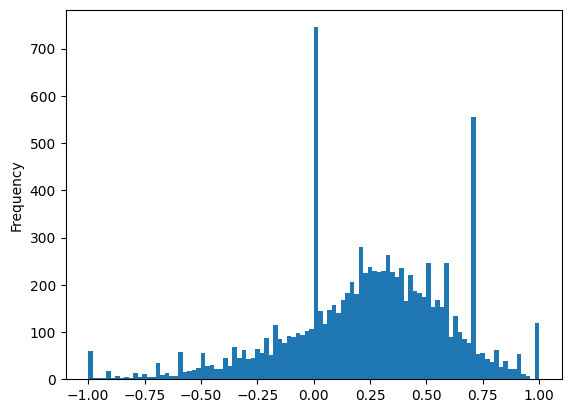

In [71]:
# Visualizing the polarity using histogram.
review_df['Polarity'].plot(kind='hist', bins=100)

##### 1. Why did you pick the specific chart?

I picked barplot for the above graph because it show frequency level for different category.



##### 2. What is/are the insight(s) found from the chart?

I picked barplot for the above graph because it show frequency level for different category.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

#### Chart - 14 - Correlation Heatmap

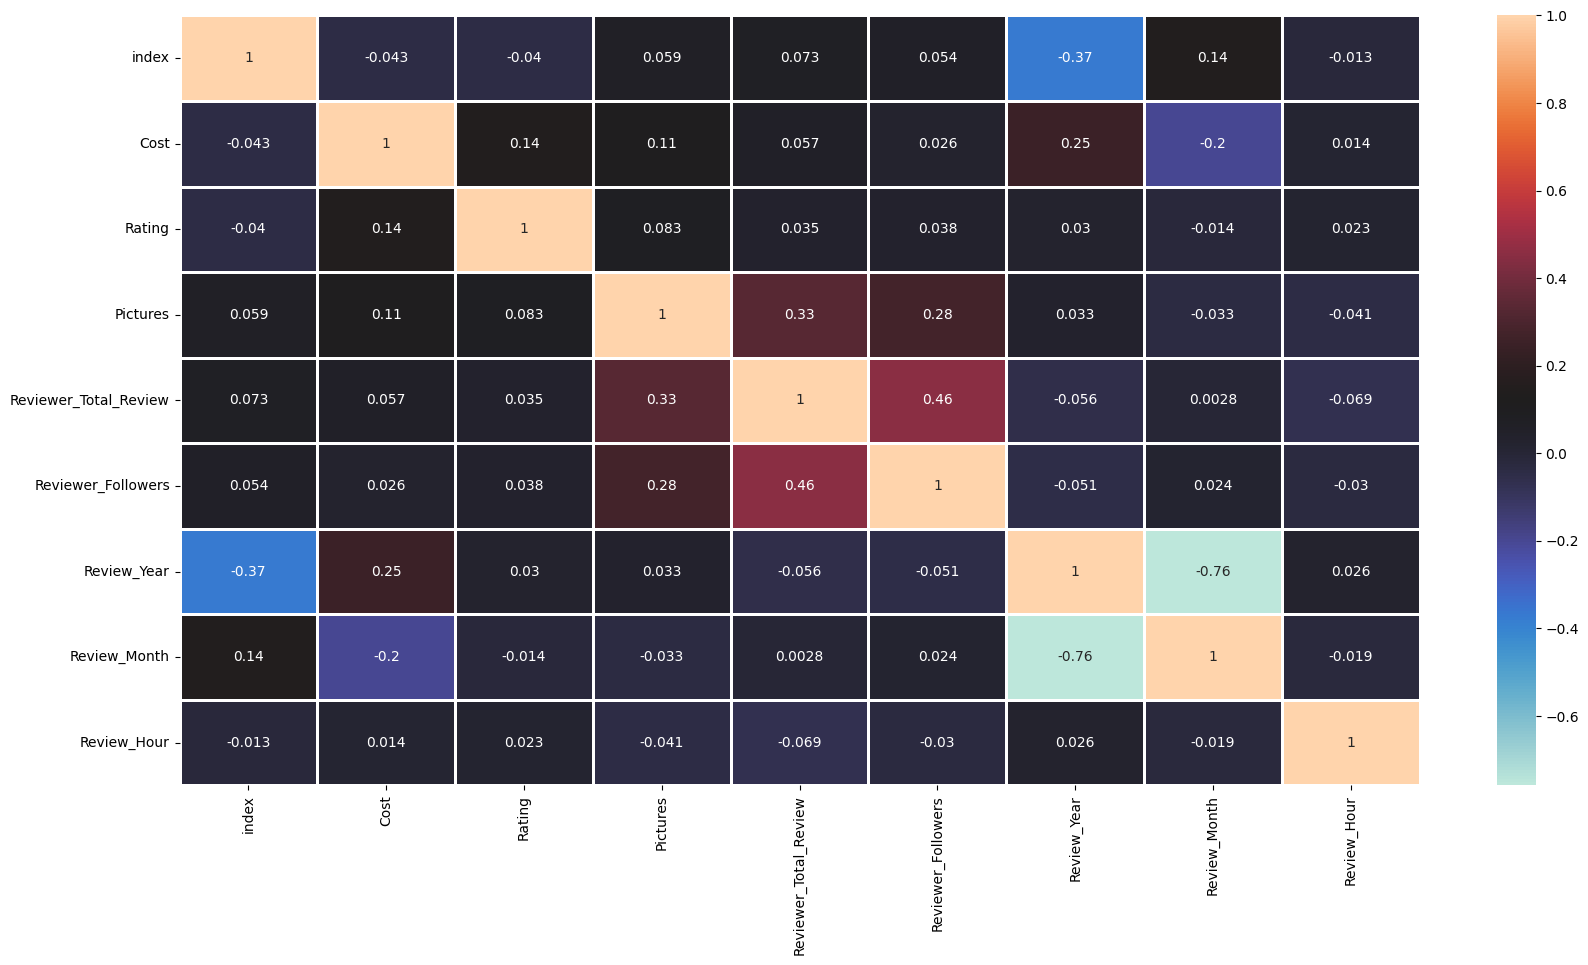

In [72]:
# Correlation Heatmap visualization code

# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

Rest all correlation can be depicted from the above chart

#### Chart - 15 - Pair Plot

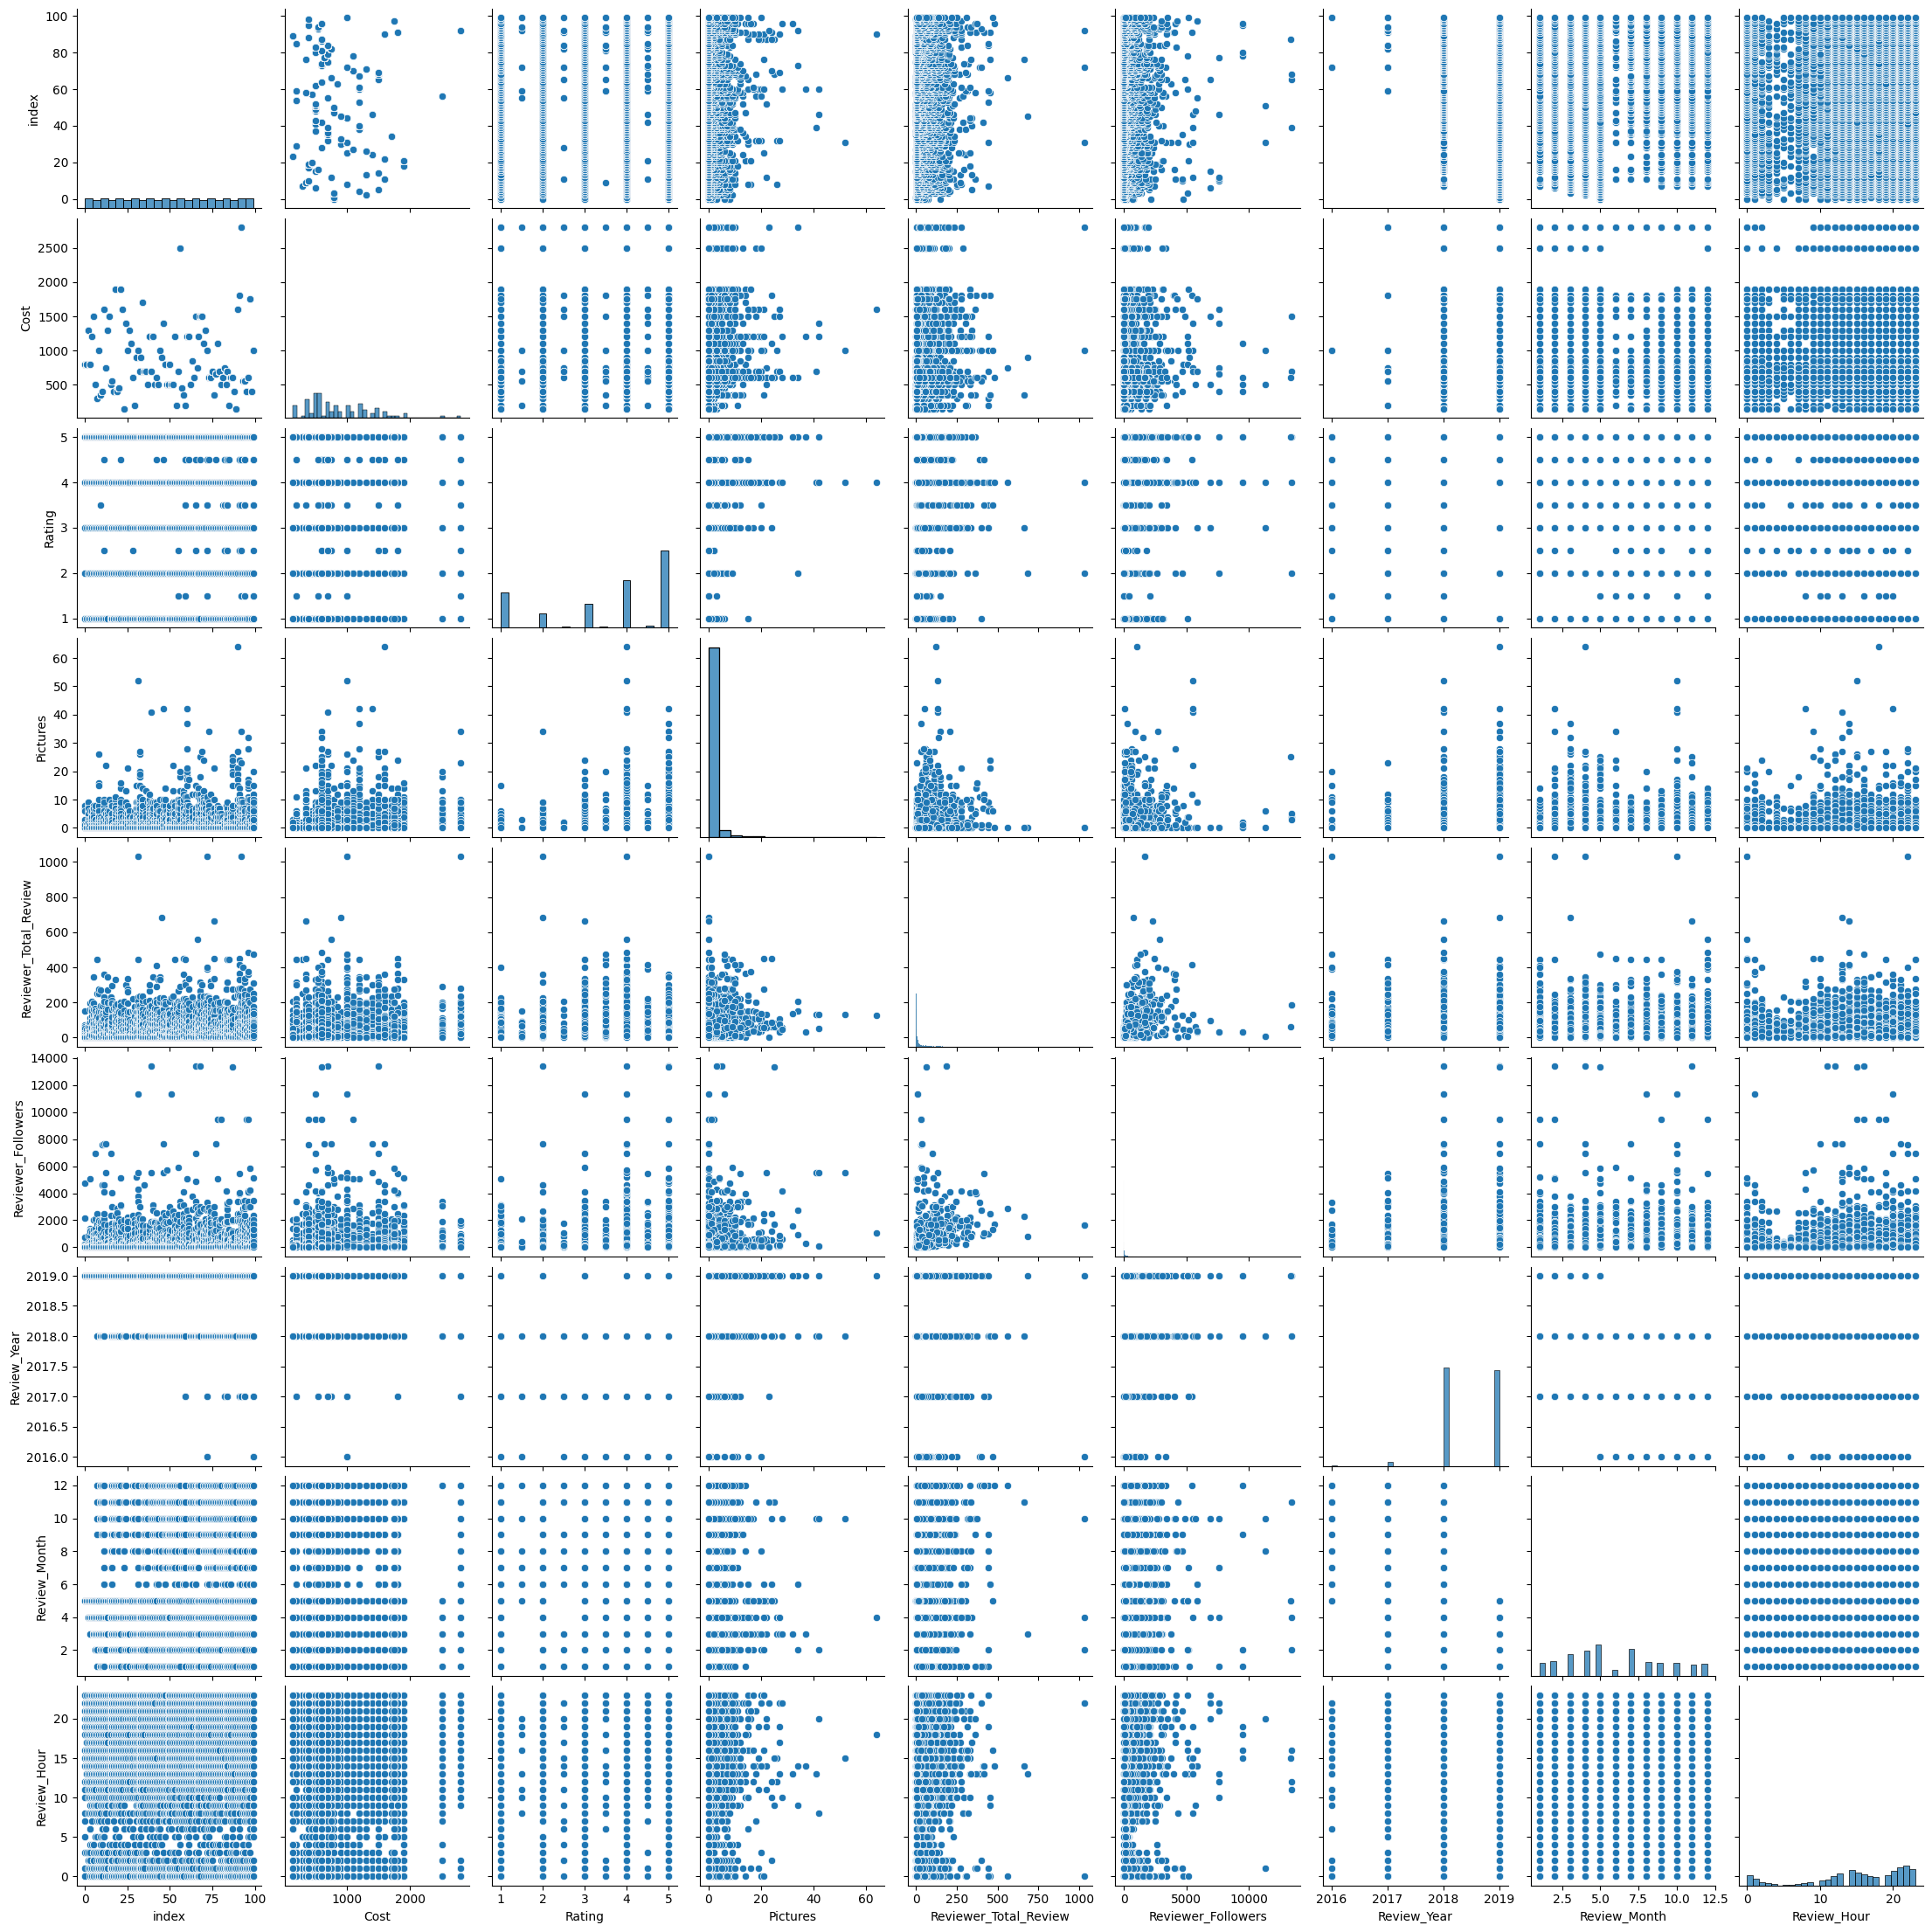

In [73]:
# Pair Plot visualization code

# Pair Plot visualization code
sns.pairplot(merged);

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.
* Restaurants that are reviewed by reviewers with more followers will have a higher rating.
* Restaurants that offer a wider variety of cuisines will have a higher rating

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [74]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value

# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used Simple Linear Regression Test

##### Why did you choose the specific statistical test?


I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [76]:
# Perform Statistical Test to obtain P-Value

pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating    1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Cuisines                                             
American    1    0    1    0    2    0    8    0   88

In [77]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?


I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [78]:
#deleting duplicate value from review dataset
review = review_df.drop_duplicates()


#final check after dropping duplicates
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")


Anymore duplicate left ? False    9964
dtype: int64, unique values with 0 duplication


In [79]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

index           0
Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [80]:
#checking the null value in timing
hotel[hotel['Timings'].isnull()]

#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)


#checking null values in Collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')



#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)


#final checking of missing value
hotel.isnull().sum()

Percentage of missing value in Collections is 51.43%


index         0
Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

In [81]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      0
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 2
Review_Month                2
Review_Hour                 2
Polarity                    0
dtype: int64

In [82]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])


#again checking the remaining values
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Reviewer_Followers', 1578)]

In [83]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})


# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
Polarity                 0
dtype: int64

In [84]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 18)

#### What all missing value imputation techniques have you used and why did you use those techniques?

In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer - 2, Review - 9, Rating - 2, Metadata - 2, Time - 2, Reviewer_Total_Review- 3, Reviewer_Followers - 1581, Review_Year - 2, Review_Month - 2, Review_Hour - 2. On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0

### Handling Outliers

In [85]:
# Handling Outliers & Outlier treatments


#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


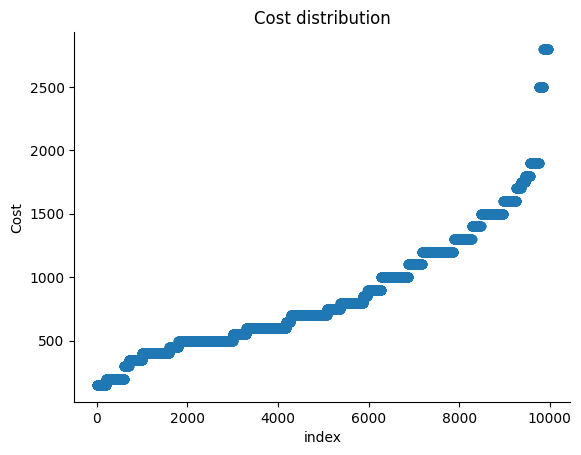

In [86]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

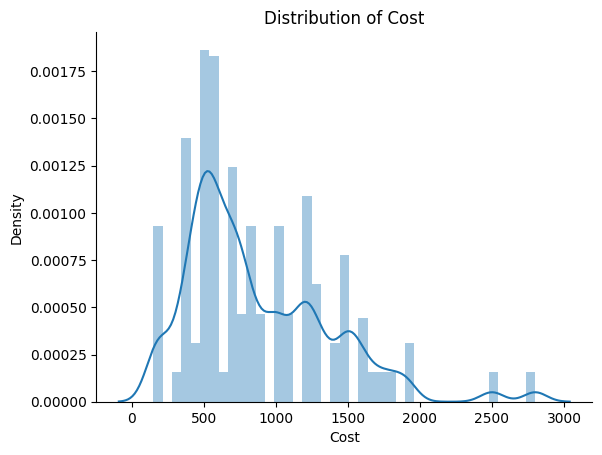

In [87]:
  #distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

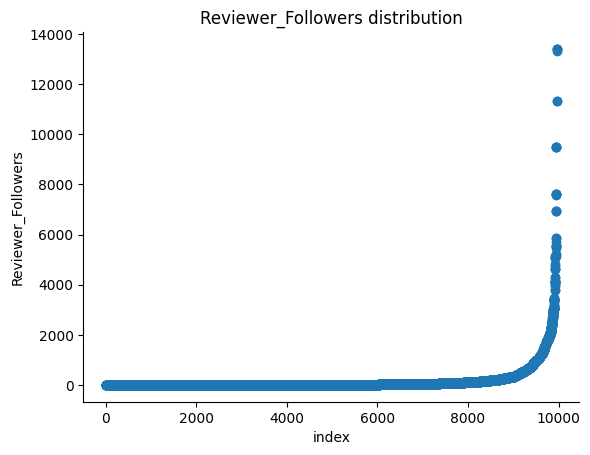

In [88]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

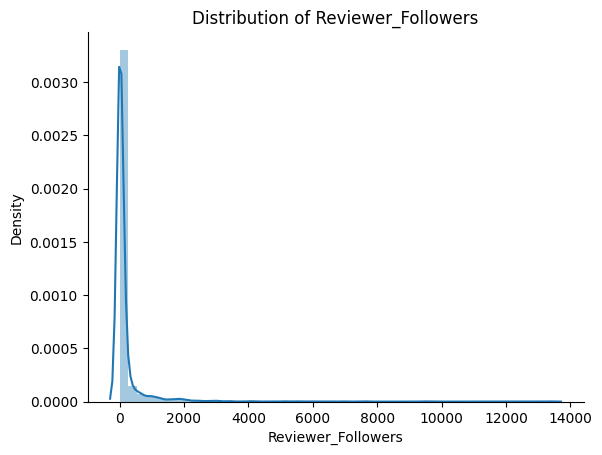

In [89]:

#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

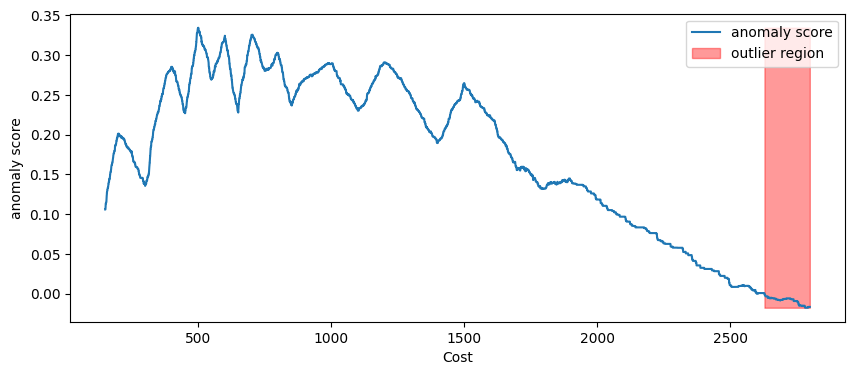

In [90]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))


#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

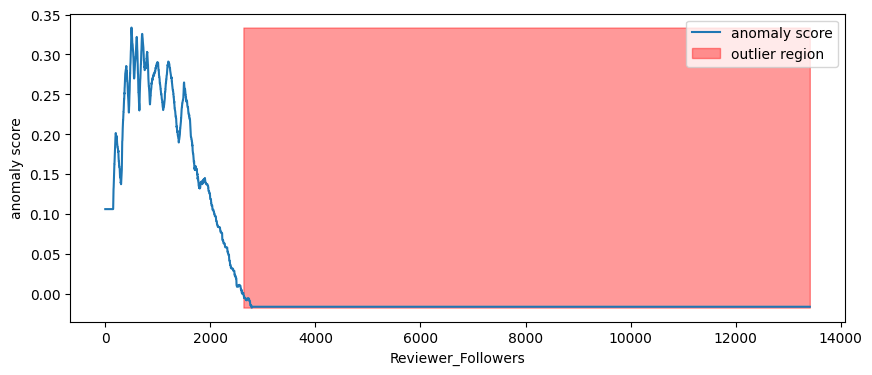

In [91]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

In [92]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Polarity', 'anomaly_score_univariate_Cost', 'outlier_univariate_Cost']
Skew Symmetric Distributed Features : - ['index', 'Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [94]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]


# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]




##### What all outlier treatment techniques have you used and why did you use those techniques?

Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method

###  Categorical Encoding

In [97]:
# Encode your categorical columns

In [98]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()


#total cuisine count
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))


#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

index       Restaurant                                              Links  \
0      0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   

   Cost                                           Cuisines  \
0   800  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [99]:

#adding cost column to the new dataset
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')


cluster_dummy.shape


(100, 48)

In [100]:
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]


#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])


#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0


#result from encoding
cluster_df.head(2).T

0  \
Restaurant                                             Beyond Flavours   
Cuisines             Chinese, Continental, Kebab, European, South I...   
Cost                                                             800.0   
Average_Rating                                                    4.28   
Total_Cuisine_Count                                                6.0   
Chinese                                                              1   
Continental                                                          1   
Kebab                                                                1   
European                                                             1   
South Indian                                                         1   
North Indian                                                         1   
Biryani                                                              0   
Asian                                                                0   
Mediterranean                                                        0   
Desserts                                                             0   
Seafood                                                              0   
Beverages                                                            0   
Goan                                                                 0   
Healthy Food                                                         0   
Lebanese                                                             0   
American                                                             0   
Ice Cream                                                            0   
Street Food                                                          0   
Fast Food                                                            0   
BBQ                                                                  0   
Italian                                                              0   
Finger Food                                                          0   
Burger                                                               0   
Japanese                                                             0   
Salad                                                                0   
Sushi                                                                0   
Mexican                                                              0   
Mughlai                                                              0   
Andhra                                                               0   
Bakery                                                               0   
Juices                                                               0   
Arabian                                                              0   
Hyderabadi                                                           0   
Cafe                                                                 0   
Spanish                                                              0   
Wraps                                                                0   
Thai                                                                 0   
Indonesian                                                           0   
Modern Indian                                                        0   
Momos                                                                0   
Pizza                                                                0   
North Eastern                                                        0   
Mithai                                                               0   
Malaysian                                                            0   

                                                  1  
Restaurant                                 Paradise  
Cuisines             Biryani, North Indian, Chinese  
Cost                                          800.0  
Average_Rating                                  4.7  
Total_Cuisine_Count                             3.0  
Chinese                                     

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0. Benefit of using one hot encoding:

Handling categorical variables with no ordinal relationship:
One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

Handling categorical variables with many unique values
One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

Handling categorical variables with multiple levels
One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

Handling categorical variables with missing values
One-hot encoding can handle missing values by creating a new category for them.

Model interpretability
One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

Compatibility with many machine learning models
One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [101]:
# Expand Contraction


In [102]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

Reviewer       Restaurant  Rating  \
1115  Chhaya Sharma  Barbeque Nation     4.0   
9881          Jigar         Triptify     1.0   

                                                 Review  
1115  barbeque is mostly my favorite but if i compar...  
9881  very thick parathas made with more dough and l...

In [104]:

#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

sentiment_df.sample(2)

index           Reviewer                 Restaurant  Rating  \
5533   5533  Rohit Kumar Gupta                 Cafe Eclat     4.0   
1407   1407       Soumyaranjan  AB's - Absolute Barbecues     5.0   

                                                 Review  
5533  we ordered eggs benedict and american pancakes...  
1407  food is absolutely fantastic here and the serv...

#### 2. Lower Casing

In [110]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [111]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

#### 3. Removing Punctuations

In [112]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)


In [113]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index           Reviewer                  Restaurant  Rating  \
4319   4319      Dhawal Lingam  The Foodie Monster Kitchen     1.0   
737     737      Aniket Sharma    Shah Ghouse Spl Shawarma     5.0   
980     980        Sushma Kota                 Cream Stone     1.0   
666     666  Charushila Biswas                     eat.fit     4.0   
2032   2032       Asha Bishnoi                    13 Dhaba     5.0   

                                                 Review  
4319  i ordered a green chicken rice bowl largeit ha...  
737   was a great having one of the best shawarmaeve...  
980   poor service have ordered ice cream and it too...  
666   everybody is talking about eat fit these days ...  
2032  this place is epitome of punjabi foodif i have...

#### 4. Removing URLs & Removing words and digits contain digits.

In [114]:
# Remove URLs & Remove words and digits contain digits

import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [115]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

index  Restaurant                                              Links  \
78     78  Khaan Saab  https://www.zomato.com/hyderabad/khaan-saab-ga...   
95     95  Desi Bytes  https://www.zomato.com/hyderabad/desi-bytes-ga...   

    Cost               Cuisines                                  Timings  \
78  1100  North Indian, Mughlai     12 Noon to 3:30 PM, 7 PM to 11:30 PM   
95   400  North Indian, Chinese  1 PM to 2 AM (Mon, Wed-Sun), Tue Closed   

    Total_Cuisine_Count  Average_Rating   Location  
78                    2             3.8  hyderabad  
95                    2             2.9  hyderabad

#### 5. Removing Stopwords & Removing White spaces

In [129]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [117]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [120]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [122]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#random sample
sentiment_df.sample(2)

index          Reviewer Restaurant  Rating         Review
652     652  Sachdevajyoti579    eat.fit     3.0  quantity less
9844   9844     Manonit Singh   Triptify     5.0           good

#### 6. Rephrase Text

In [124]:
 # Rephrase Text
# from nltk.corpus import wordnet

# #function to create rephrase sentence
# def rephrase_sentence(sentence):
#     # Tokenize the sentence
#     tokens = nltk.word_tokenize(sentence)

#     # Replace each token with its synonyms
#     new_sentence = []
#     for token in tokens:
#         synonyms = wordnet.synsets(token)
#         if synonyms:
#             new_sentence.append(synonyms[0].lemmas()[0].name())
#         else:
#             new_sentence.append(token)

#     # Join the tokens back into a sentence
#     rephrased_sentence = " ".join(new_sentence)

#     return rephrased_sentence

# # apply the function to the 'Review' column
# sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_sentence)


not needed in this case

In [123]:
# Rephrase Text
sentiment_df.sample(2)

index     Reviewer                               Restaurant  Rating  \
9071   9071  Vinay Singh  Cascade - Radisson Hyderabad Hitec City     5.0   
9771   9771  Suman Basak                                 Triptify     1.0   

                                                 Review  
9071  opportunity cascade days must say food served ...  
9771  food used good live cockroach came food second...

#### 7. Tokenization

In [128]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

sentiment_df.sample(2)


index                   Reviewer       Restaurant  Rating  \
1160   1160  Satyanarayana Murty Karra  Barbeque Nation     4.0   
8378   8378                      Awadh             GD's     5.0   

                                                 Review  
1160  [awesome, place, good, ambiance, great, food, ...  
8378                                                 []

#### 8. Text Normalization

In [132]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

In [133]:
sentiment_df.sample(2)

index         Reviewer    Restaurant  Rating  \
3028   3028  Prasun Gokhlani    Pot Pourri     4.0   
4297   4297    Vijay Saradhi  Karachi Cafe     3.0   

                                                 Review  
3028  [loved, food, felt, ambience, improved, extra,...  
4297  [taste, haleem, good, quantity, good, price, c...

##### Which text normalization technique have you used and why?

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important

#### 9. Part of speech tagging

In [137]:
# POS Taging

sentiment_tfid = sentiment_df.copy()

sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
sentiment_tfid.head()


index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  [(ambience, RB), (good, JJ), (food, NN), (quit...  
1  [(ambience, RB), (good, JJ), (pleasant, NN), (...  
2  [(must, MD), (try, VB), (great, JJ), (food, NN...  
3  [(soumen, NNS), (da, VBP), (arun, RB), (great,...  
4  [(food, NN), (goodwe, NN), (ordered, VBD), (ko...

#### 10. Text Vectorization

In [138]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)


In [139]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)


In [140]:

#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

##### Which text vectorization technique have you used and why?

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [150]:
# Manipulate Features to minimize feature correlation and create new features

hotel.shape

(100, 9)

In [151]:
#columns for dataset
hotel.columns

Index(['index', 'Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

In [152]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [153]:
hotel.shape

(100, 7)

In [154]:
cluster_df.shape

(100, 49)

In [156]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

KeyError: "['Restaurant', 'Cuisines'] not found in axis"

In [157]:
cluster_df.sample(1)

Cost  Average_Rating  Total_Cuisine_Count Chinese Continental Kebab  \
6  1.090709             3.2                  4.0       0           1     0   

  European South Indian North Indian Biryani  ... Spanish Wraps Thai  \
6        0            1            1       0  ...       0     0    0   

  Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
6          0             0     0     0             0      0         0  

[1 rows x 47 columns]

In [158]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(100, 48)

In [159]:
#review data shape
review.shape

(9961, 13)

In [160]:
#review column
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour', 'Polarity'],
      dtype='object')

In [161]:

#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [162]:
#sentiment data frame
sentiment_df.sample(2)

index                Reviewer         Restaurant  Rating  \
1227   1227  Sai Kumar Machabathuni  Absolute Sizzlers     4.0   
5711   5711                MB Reddy       Being Hungry     1.0   

                                                 Review  Sentiment  
1227  [first, time, taste, dish, totally, satisfied,...          1  
5711  [odred, got, biryani, guy, dont, know, differe...          0

2. Feature Selection

In [163]:
hotel.columns

Index(['index', 'Restaurant', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating'],
      dtype='object')

In [164]:
#feature selcted for clustering
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [165]:

cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [166]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour', 'Polarity'],
      dtype='object')

In [167]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

**5. Data Transformation**

In [168]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)


Symmetric Distributed Features : - ['Cost', 'Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - []


In [170]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])


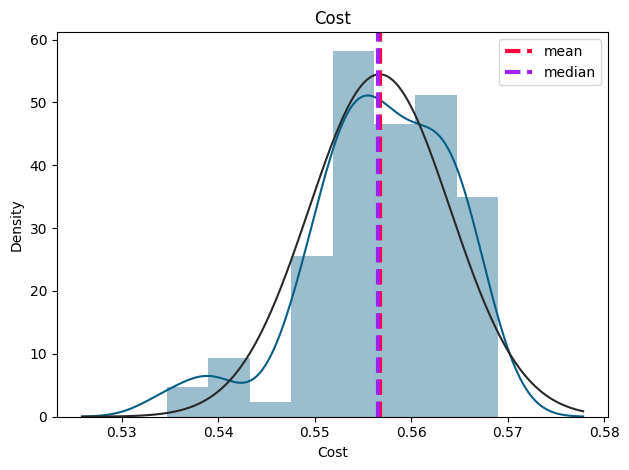

In [172]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

### 6. Data Scaling

In [144]:
# Scaling your data

cluster_dummy.sample(5)

Restaurant      Cost  Average_Rating  Total_Cuisine_Count  \
90         Arena Eleven  1.139644        4.117647                    1   
69       The Indi Grill  1.137168        4.600000                    3   
39        Deli 9 Bistro  1.105879        3.820000                    3   
37  Kritunga Restaurant  1.090709        3.470000                    4   
49        Mathura Vilas  1.090709        2.820000                    3   

    American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
90         0       0        0      0    0       0  ...             0      0   
69         0       0        0      1    1       0  ...             0      0   
39         0       0        0      0    0       0  ...             0      0   
37         0       1        0      0    0       0  ...             1      0   
49         0       0        0      0    0       0  ...             1      0   

    Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
90      0        0             0        0            0      0     0      0  
69      0        0             0        0            0      0     0      0  
39      0        0             0        0            0      0     0      0  
37      0        0             0        0            0      0     0      0  
49      0        0             1        0            0      0     0      0  

[5 rows x 48 columns]

In [191]:
#normalizing numerical columns

numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])


##### Which method have you used to scale you data and why?

* Here I have used standard scaler as those numerical columns where normally distributed.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [192]:
# DImensionality Reduction (If needed)

# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

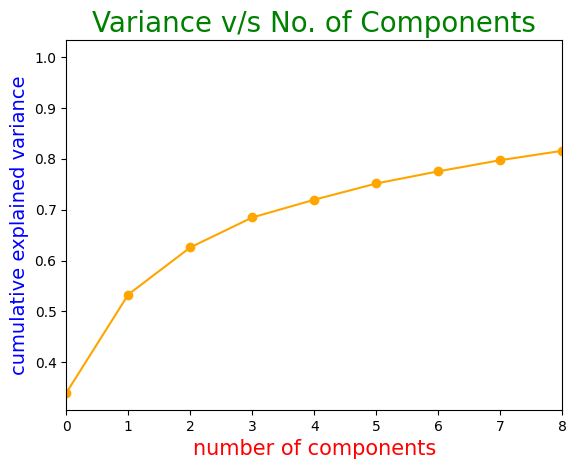

In [193]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [194]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.33987536 0.19331348 0.09258688]
Cumulative variance explained by 3 principal components: 62.58%


In [195]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible. It is a technique used to overcome the curse of dimensionality, which refers to the problem of increased computational complexity and decreased performance of machine learning models as the number of features increases.

There are two main types of dimensionality reduction techniques: feature selection and feature extraction.

Feature selection is the process of selecting a subset of the most relevant features from the original feature set. It is a technique that helps to reduce the dimensionality of the data by removing irrelevant and redundant features. Common feature selection techniques include:

* Correlation-based feature selection
* Mutual information-based feature selection
* Recursive feature elimination
* SelectKBest

### 8. Data Splitting

In [177]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [178]:
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']


In [179]:
sentiment_df.shape

(9961, 6)

In [180]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 17650)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17650)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why?

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [181]:
# Handling Imbalanced Dataset (If needed)

In [182]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns =
            {'index':'Sentiment','Sentiment':'Count'})

In [183]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [184]:

#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.701654461621915

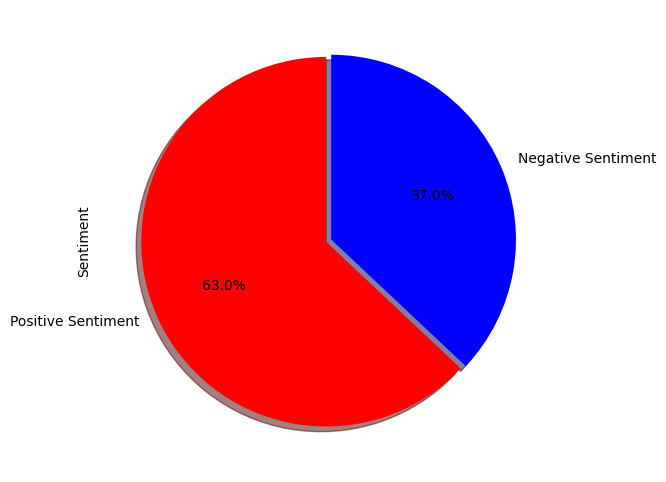

In [185]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes, there is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance.

## ***7. ML Model Implementation***

### ML Model - 1

**KMeans Clustering**

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

ELBOW METHOD

* This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

ILHOUETTE METHOD

* The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

In [196]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [197]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

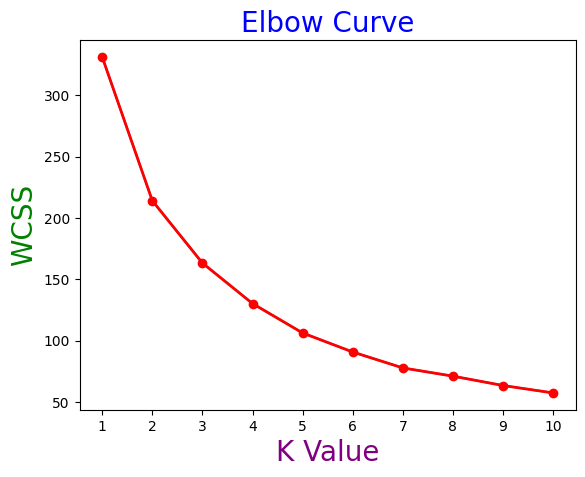

In [198]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.2950581935494715
For n_clusters = 3 average silhouette_score is : 0.28846367456058075
For n_clusters = 4 average silhouette_score is : 0.3113439776058369
For n_clusters = 5 average silhouette_score is : 0.3137216509992775
For n_clusters = 6 average silhouette_score is : 0.31898541185147555
For n_clusters = 7 average silhouette_score is : 0.32299164743501124
For n_clusters = 8 average silhouette_score is : 0.29148558905363586
For n_clusters = 9 average silhouette_score is : 0.3189736957583498


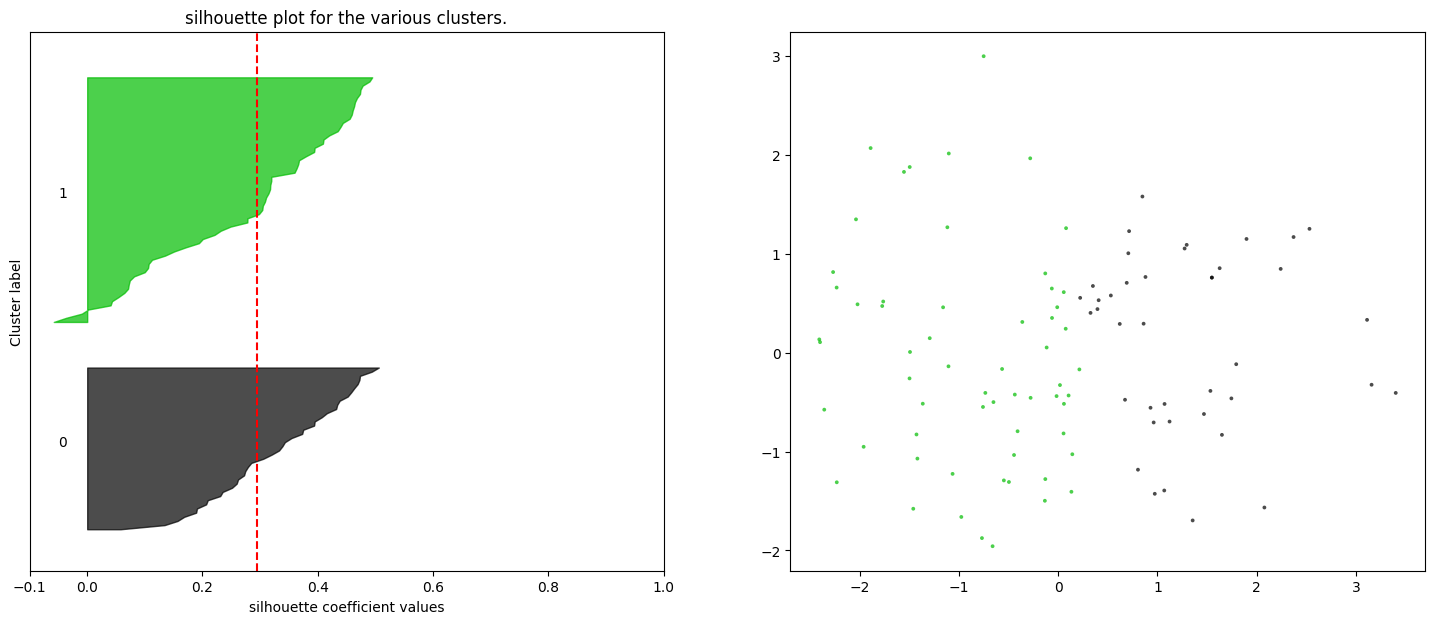

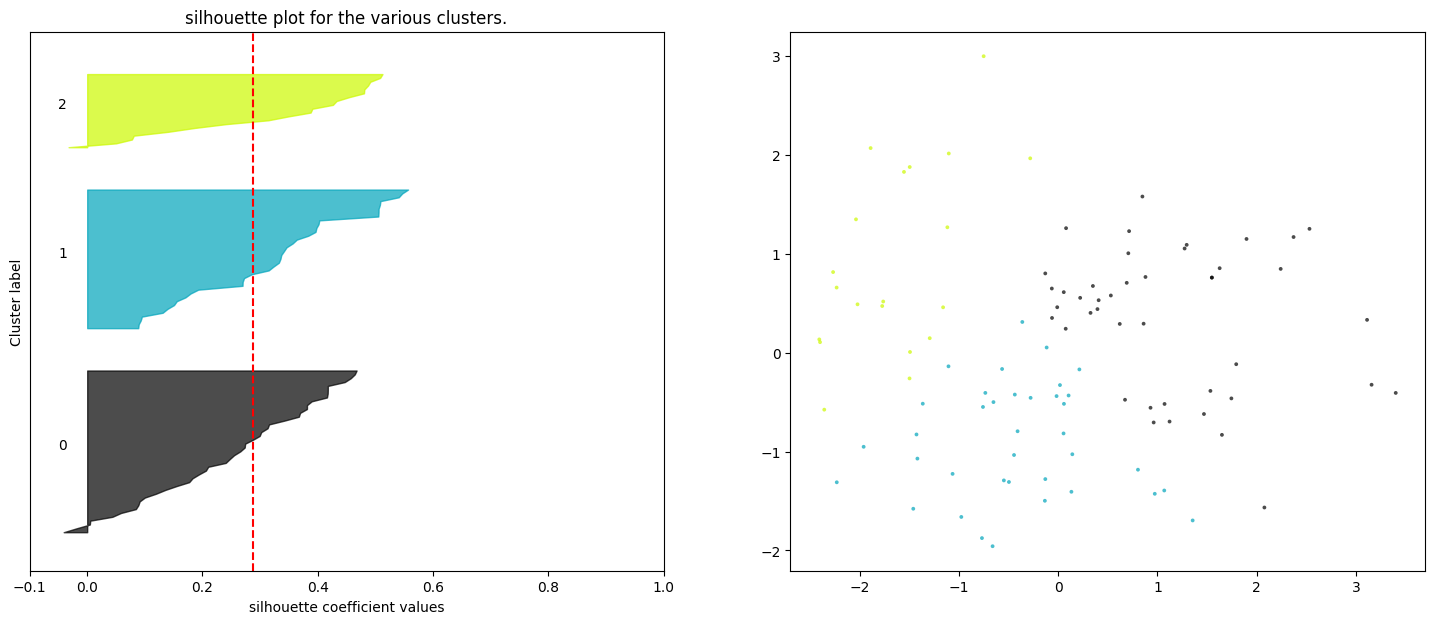

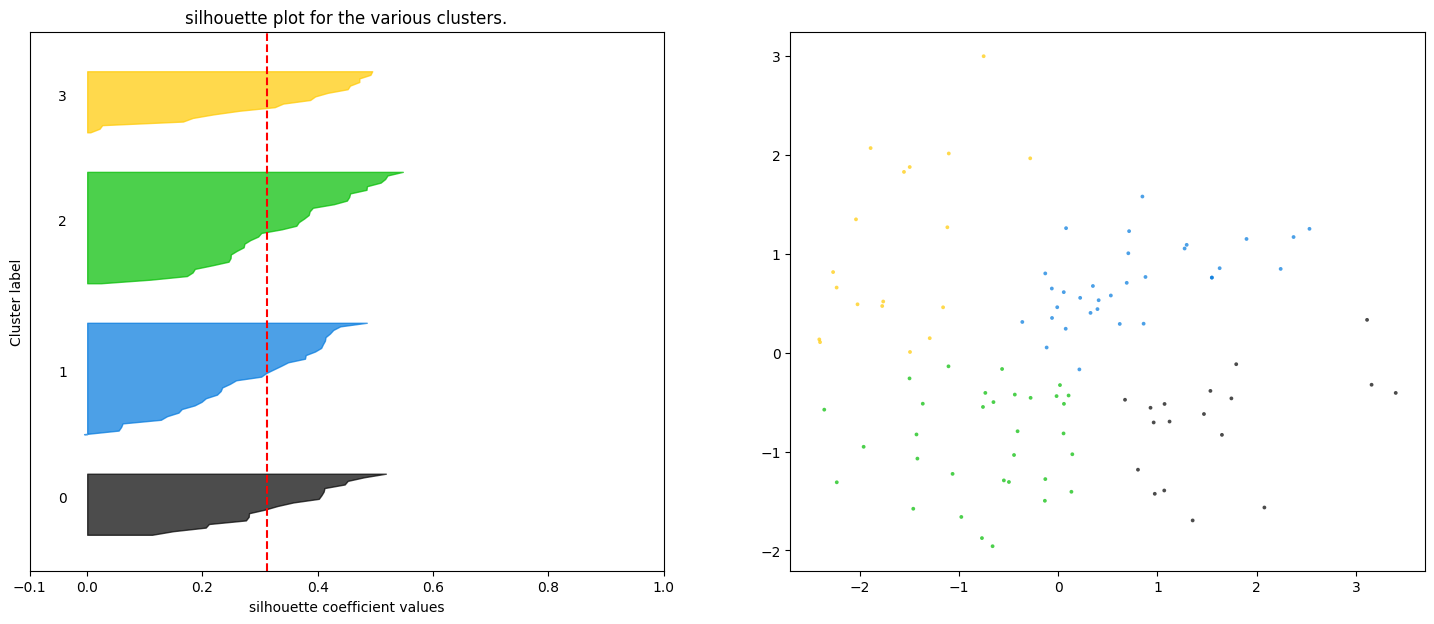

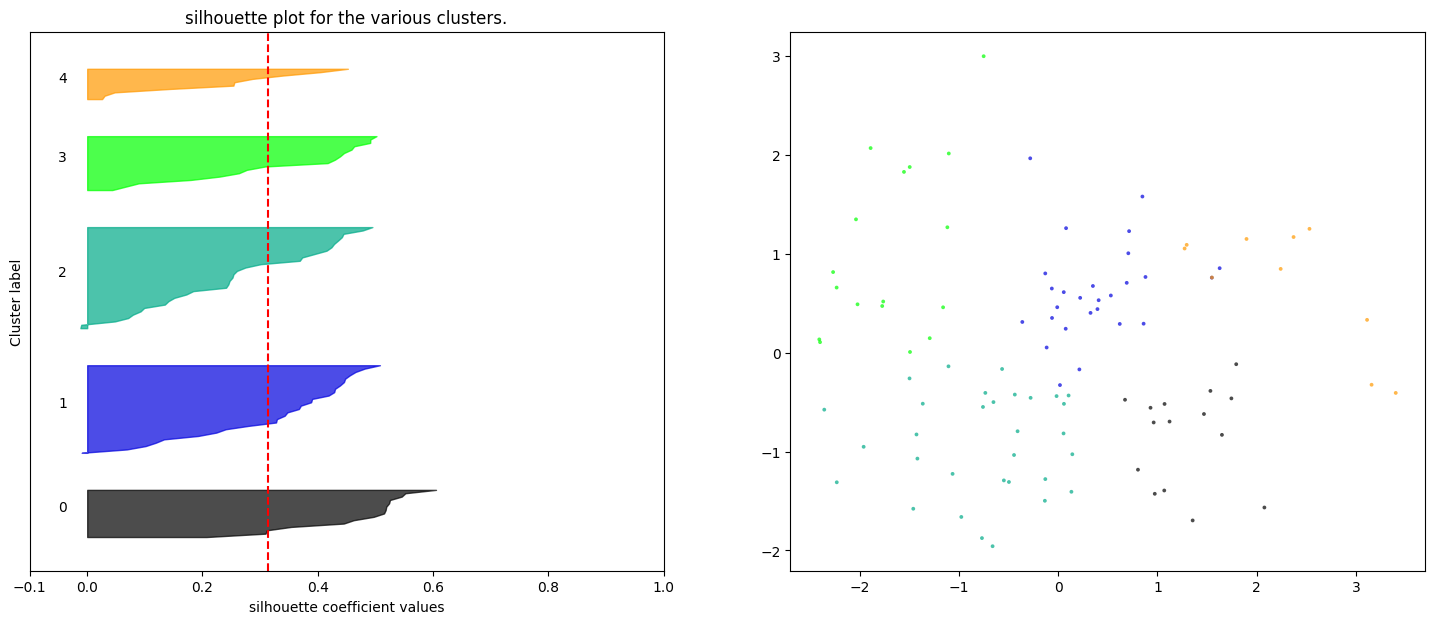

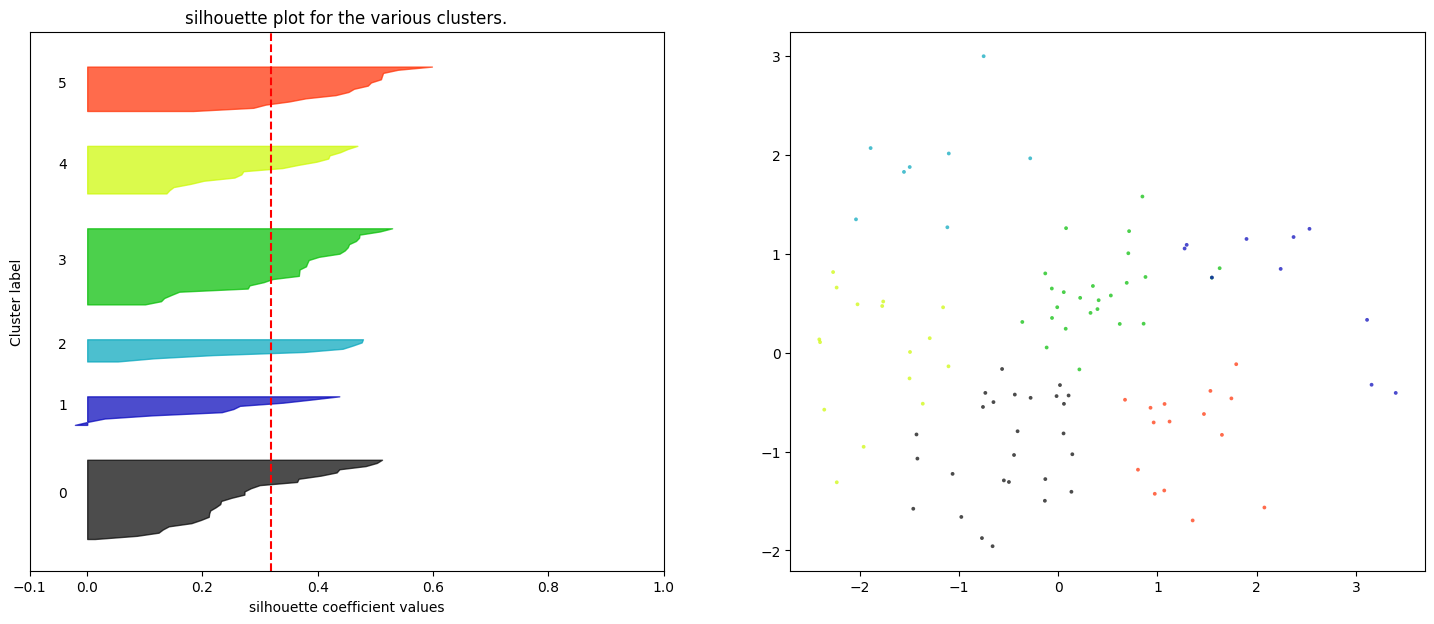

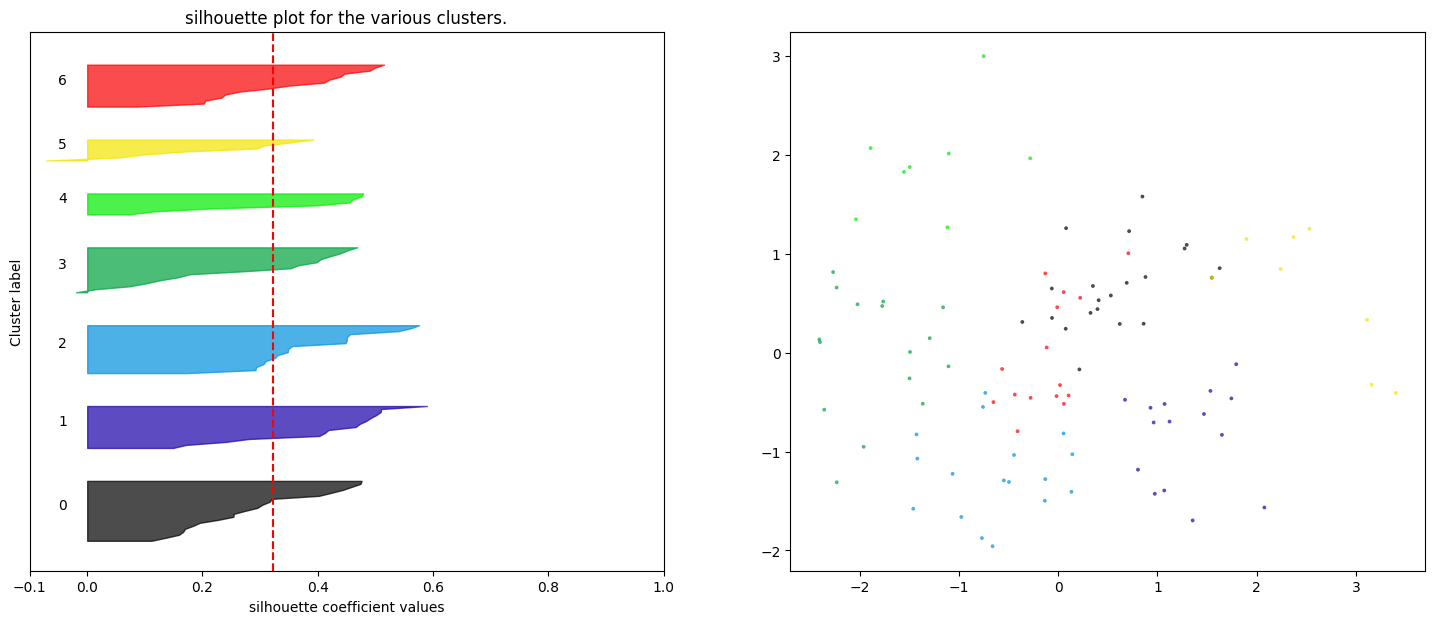

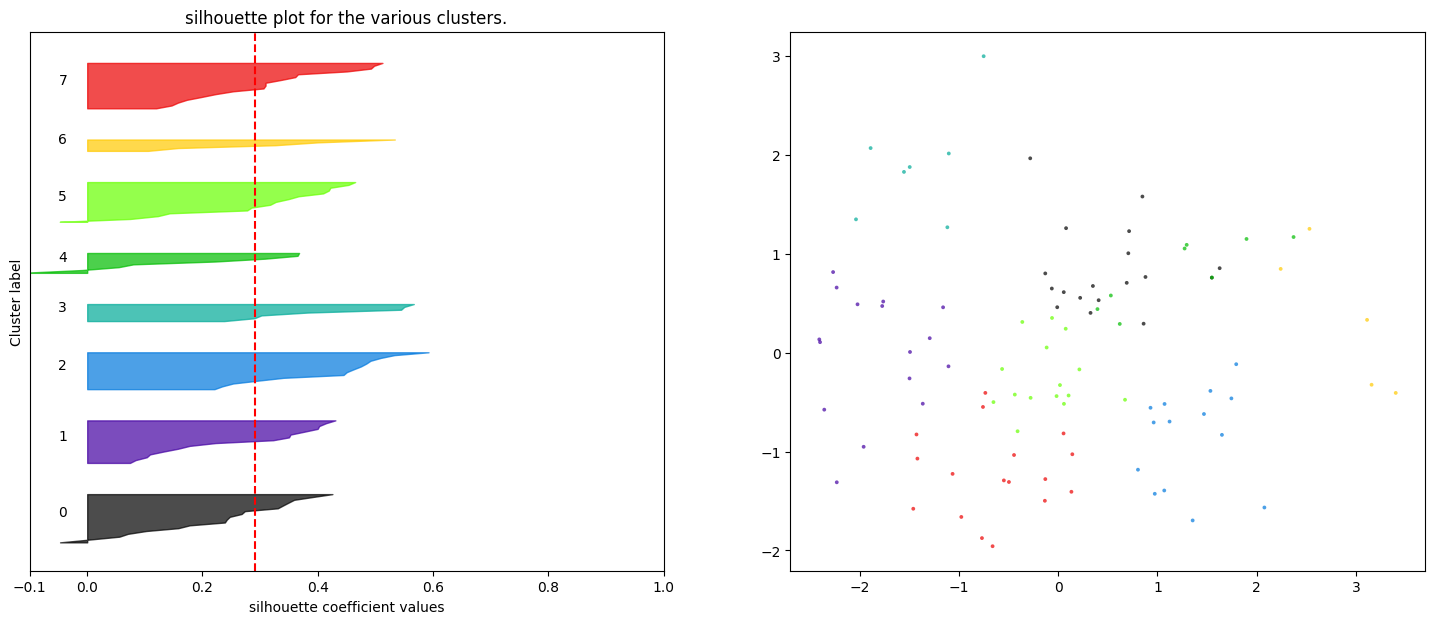

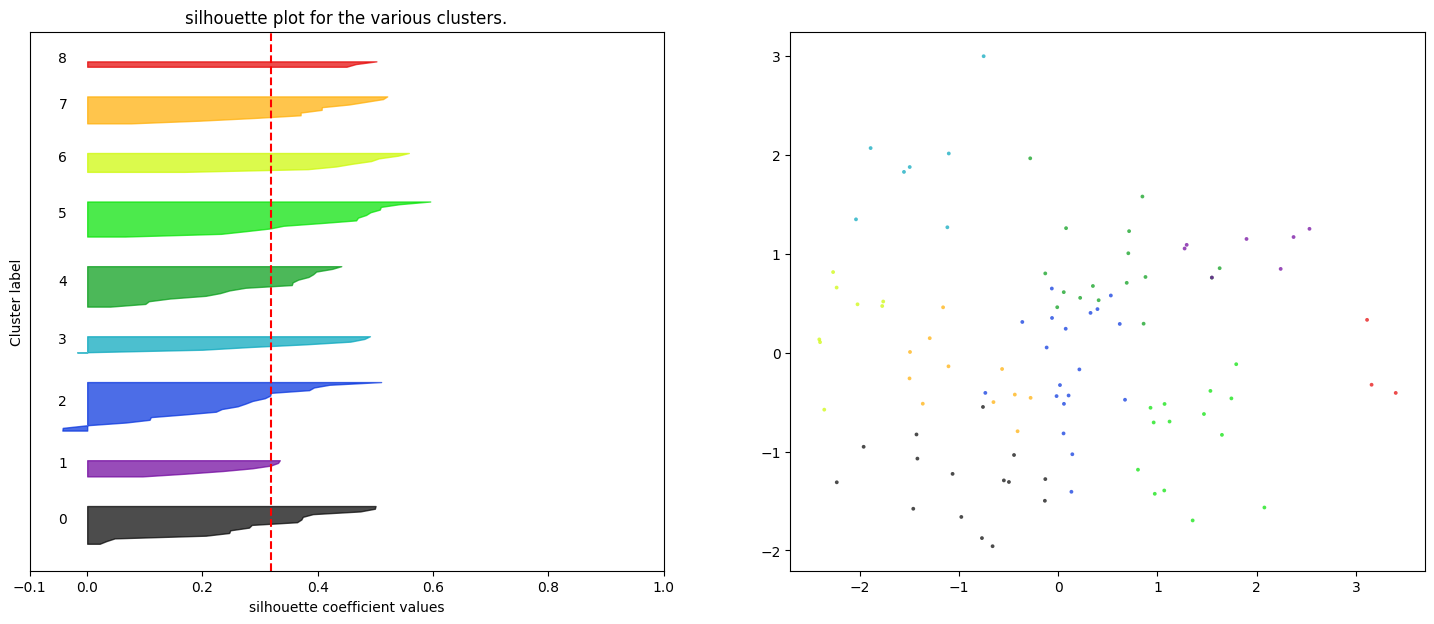

In [200]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')



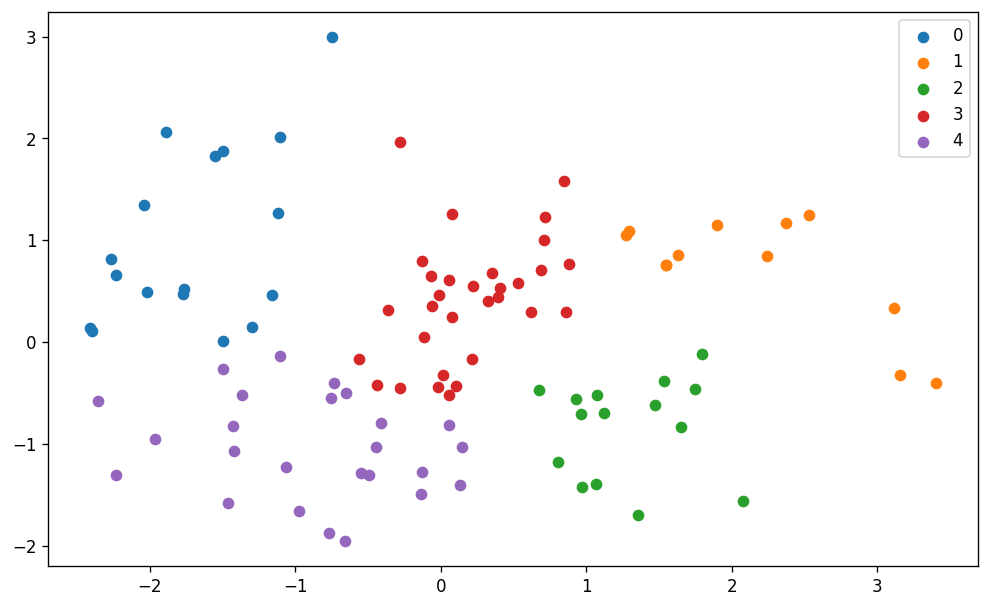

In [201]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [202]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

PC1       PC2       PC3  label
Restaurant                                        
Deli 9 Bistro -0.064592  0.647752  0.328202      3
GD's           0.714149  1.227549  0.304661      3

In [203]:

#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                    
KS Bakers           0.539412           3.965                    3         0   
Hunger Maggi Point  0.539412           3.120                    1         0   

                    Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                          ...   
KS Bakers                0        0      0    0       1          0  ...   
Hunger Maggi Point       0        0      0    0       0          0  ...   

                    Pizza  Salad  Seafood  South Indian  Spanish  Street Food  \
Restaurant                                                                      
KS Bakers               0      0        0             0        0            0   
Hunger Maggi Point      0      0        0             0        0            0   

                    Sushi  Thai  Wraps  label  
Restaurant                                     
KS Bakers               0     0      0      1  
Hunger Maggi Point      0     0      0      1  

[2 rows x 48 columns]

In [204]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                     
Shanghai Chef 2      0.747472            3.06                    4         0   
Mohammedia Shawarma  0.706903            2.99                    2         0   

                     Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                           ...   
Shanghai Chef 2           0        0      1    0       0          0  ...   
Mohammedia Shawarma       0        1      0    0       0          0  ...   

                     Pizza  Salad  Seafood  South Indian  Spanish  \
Restaurant                                                          
Shanghai Chef 2          0      0        0             0        0   
Mohammedia Shawarma      0      0        0             0        0   

                     Street Food  Sushi  Thai  Wraps  label  
Restaurant                                                   
Shanghai Chef 2                0      0     1      0      4  
Mohammedia Shawarma            1      0     0      0      1  

[2 rows x 48 columns]

In [205]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

label  Total_Restaurant
4      1                12
3      2                15
2      0                17
1      4                25
0      3                31

In [206]:

#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines      Cost  \
79                           Olive Garden  North Indian  0.744733   
2                                Flechazo         Asian  0.756867   
67  Yum Yum Tree - The Arabian Food Court    Hyderabadi  0.755376   
92   Collage - Hyatt Hyderabad Gachibowli  North Indian  0.766545   
92   Collage - Hyatt Hyderabad Gachibowli   Continental  0.766545   

    Average_Rating  Total_Cuisine_Count  label  
79            3.76                    4      4  
2             4.66                    4      0  
67            3.56                    2      3  
92            3.41                    5      4  
92            3.41                    5      4

In [207]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra'
 'Hyderabadi' 'Spanish' 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Momos'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Continental' 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American'
 'Italian' 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 2 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Desserts' 'Kebab' 'Cafe' 'Pizza'] 

Cuisine List for Cluster : 3 

['Continental' 'American' 'Chinese' 'North Indian' 'Itali

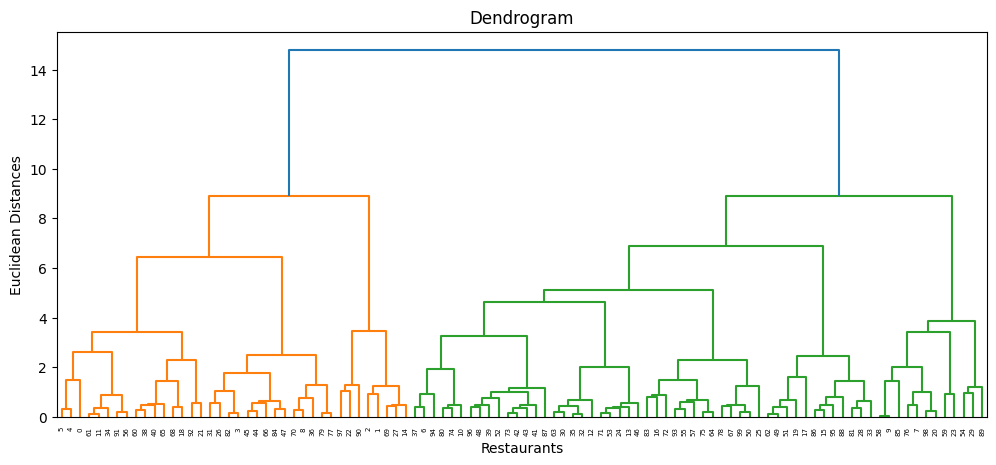

In [208]:

#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [209]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.30072013055942687
For n_clusters = 3, silhouette score is 0.2876577199606417
For n_clusters = 4, silhouette score is 0.26868681751680146
For n_clusters = 5, silhouette score is 0.27804257788491393
For n_clusters = 6, silhouette score is 0.29168104361943187
For n_clusters = 7, silhouette score is 0.2708340693394337
For n_clusters = 8, silhouette score is 0.29086817914721275
For n_clusters = 9, silhouette score is 0.3009244415309029
For n_clusters = 10, silhouette score is 0.30256614311731256
For n_clusters = 11, silhouette score is 0.31427805211721077
For n_clusters = 12, silhouette score is 0.3284027555319971
For n_clusters = 13, silhouette score is 0.3347149350701979
For n_clusters = 14, silhouette score is 0.33938322194900455
For n_clusters = 15, silhouette score is 0.3455040274373467


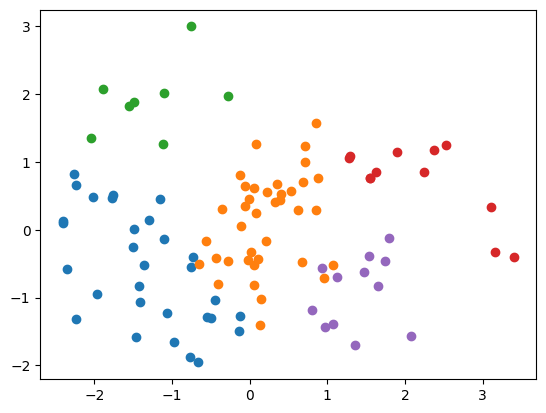

Silhouette Coefficient: 0.278
davies_bouldin_score 1.066


In [210]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))



In [211]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc

In [212]:

clustering_result.sample(5)

Restaurant                        Cuisines      Cost  \
81                   Delhi-39           North Indian, Chinese  0.741481   
32       Marsala Food Company  Arabian, North Indian, Chinese  0.744733   
35  Green Bawarchi Restaurant  North Indian, Chinese, Biryani  0.744733   
12          Absolute Sizzlers  Continental, American, Chinese  0.746157   
59                  KS Bakers     Bakery, Desserts, Fast Food  0.714998   

    Average_Rating  Total_Cuisine_Count  label  label_hr  
81           2.975                    2      2         4  
32           3.460                    3      3         1  
35           3.490                    3      3         1  
12           3.620                    3      3         1  
59           3.965                    3      1         3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [213]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [214]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [218]:
# Visualizing evaluation Metric Score chart

#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))

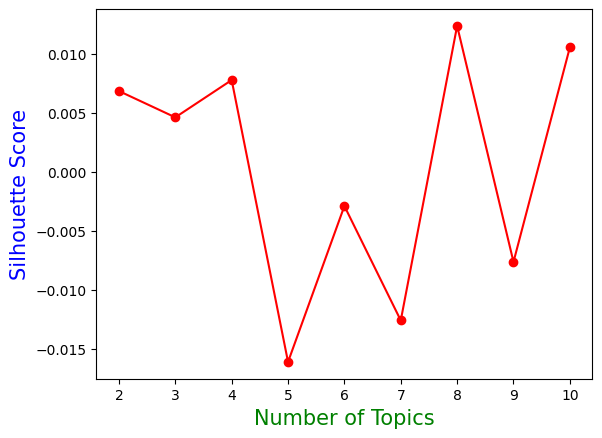

In [219]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()


In [220]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [232]:
#using pyldavis to visualise

import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [227]:
# ploting the clusters top 30 terms
lda_pyLDAvis = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
lda_pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'pyLDAvis' has no attribute 'sklearn'

In [233]:

#creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  the ambience was good, food was quite good . h...     5.0   
1  ambience is too good for a pleasant evening. s...     5.0   
2  a must try.. great food great ambience. thnx f...     5.0   
3  soumen das and arun was a great guy. only beca...     5.0   
4  food is good.we ordered kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                    1.0                 2.0       2019.0           5.0   
1                    3.0                 2.0       2019.0           5.0   
2                    2.0                 3.0       2019.0           5.0   
3                    1.0                 1.0       2019.0           5.0   
4                    3.0                 2.0       2019.0           5.0   

   Review_Hour  Polarity  
0         15.0  0.660000  
1         14.0  0.606667  
2         22.0  0.540000  
3         22.0  0.500000  
4         21.0  0.577500

In [234]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)


Restaurant             Reviewer  \
3159                      Pista House         Pankaj Pawar   
3131                      Pista House   Rakshitha Meghna D   
2553                       Tiki Shack              Deepika   
3007                       Pot Pourri        Swetha Talasu   
9713  Zega - Sheraton Hyderabad Hotel  Siva Sampath Tutika   

                                                 Review  Rating  \
3159  ambiance: 4/5. nice and clean place\nservice: ...     4.0   
3131  a very small place with a lot of varieties.\nw...     4.0   
2553  spent an amazing saturday night there.\ngreat ...     4.0   
3007  been here for 2 times... food is good in both ...     4.0   
9713  went to this place for lunch. opted for a set ...     5.0   

                       Metadata                Time  Pictures  \
3159  56 Reviews , 87 Followers 2018-09-28 20:57:00         1   
3131  20 Reviews , 13 Followers 2018-12-25 14:10:00         0   
2553   10 Reviews , 4 Followers 2019-04-06 14:08:00         0   
3007    4 Reviews , 3 Followers 2019-05-09 17:39:00         0   
9713   3 Reviews , 40 Followers 2019-04-02 14:07:00         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
3159                   56.0                87.0       2018.0           9.0   
3131                   20.0                13.0       2018.0          12.0   
2553                   10.0                 4.0       2019.0           4.0   
3007                    4.0                 3.0       2019.0           5.0   
9713                    3.0                40.0       2019.0           4.0   

      Review_Hour  Polarity  Prediction  
3159         20.0  0.206818           1  
3131         14.0  0.115000           1  
2553         14.0  0.400000           1  
3007         17.0  0.275000           1  
9713         14.0  0.362963           1

In [224]:
#worcloud
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [239]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()


In [240]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

#### 2. Cross- Validation & Hyperparameter Tuning

In [241]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

In [242]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

NameError: name 'print_table' is not defined

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [243]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [244]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [245]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For sentiment analysis, evaluation metrics used were precision, recall, F1-score, and accuracy.

* Precision measures the proportion of true positive predictions among all positive predictions. It is a good metric to use when the cost of false positives is high.
* Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances. It is a good metric to use when the cost of false negatives is high.
* F1-score is the harmonic mean of precision and recall, and is a good overall measure of a classifier's performance.
* Accuracy is the proportion of correctly classified instances among all instances.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized.

* XGBoost is highly regularized, which helps to prevent overfitting, making it more robust to unseen data. As a supervised learning algorithm, XGBoost can be trained on labeled data to predict sentiment labels.

* XGBoost's ensemble nature can help to improve the performance of sentiment analysis by combining the predictions of multiple models.

* XGBoost's regularization can help to prevent overfitting and make the model more robust to unseen data, which is important in sentiment analysis where the model needs to generalize to new data.

* XGBoost's speed and efficiency can be beneficial in sentiment analysis, where large datasets are common and the model needs to make predictions quickly.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Sentiment analysis was applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved.

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***